### Car Price Prediction Project:

**STATEMENT: With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model.**

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To print all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#importing dataset
df = pd.read_excel("Used_Cars.xlsx") #Reading excel file
df.head()

,Unnamed: 0,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,0,2018 Honda City,Petrol,"89,294 kms",1497,Manual,17.4 kmpl,5,Golden brown,117.6,Ventilated Disc,Drum,510,1495,1695,4440,1436,NaN,189 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,"7,65,000"
1,1,2018 Maruti Swift Dzire,Diesel,"55,435 kms",1248,Manual,28.4 kmpl,5,Grey,74.02,Disc,Drum,378,1515,1735,3995,1405Kg,-,-,https://www.cardekho.com/used-cars+in+ahmedabad,"7,45,000"
2,2,2019 Maruti Swift Dzire,Petrol,"9,386 kms",1197,Manual,22 kmpl,5,White,81.80,Ventilated Disc,Drum,378,1515,1735,3995,1315Kg,NaN,-,https://www.cardekho.com/used-cars+in+ahmedabad,"6,50,000"
3,3,2011 Volkswagen Polo,Diesel,"1,38,000 kms",1199,Manual,22.07 kmpl,5,Black,73.9,Disc,Drum,-,1453,1682,3970,-,-,164.1km/hr,https://www.cardekho.com/used-cars+in+ahmedabad,"1,85,000"
4,4,2014 Honda Amaze,Petrol,"28,679 kms",1199,Manual,18.6 kmpl,5,Red,88.50,Disc,Drum,420,1498-1501,1695,3995,-,-,-,https://www.cardekho.com/used-cars+in+ahmedabad,"4,90,000"


In [4]:
df.shape

(10420, 21)

* Here wee can see, the wee have 10420 rows and 21 columns in data that we have scrapped.
* Since I have to predict the used car price and the Car_Price column is a continuous data so it's a **Regression problem**.
* Since Unnamed: 0 is an index column so let's drop it here itself.

In [5]:
#Droping unnecessary column
df = df.drop(["Unnamed: 0"],axis=1)

### Features Information:

- Car_Name : Name of the car with Year
- Fuel_type : Type of fuel used for car engine
- Running_in_kms : Car running in kms till the date
- Endine_disp : Engine displacement/engine CC
- Gear_transmission : Type of gear transmission used in car
- Milage_in_km/ltr : Overall milage of car in Km/ltr
- Seating_cap : Availability of number of seats in the car
- color : Car color
- Max_power : Maximum power of engine used in car in bhp
- front_brake_type : type of brake system used for front-side wheels
- rear_brake_type : type of brake system used for back-side wheels
- cargo_volume : the total cubic feet of space in a car's cargo area.
- height : Total height of car in mm
- width : Width of car in mm
- length : TOtal length of the car in mm
- Weight : Gross weight of the car in kg
- Insp_score : inspection rating out of 10
- top_speed : Maximum speed limit of the car in km per hours
- City_url : Url of the page of cars from a particular city
- Car_price : Price of the car

In [6]:
# ReChecking shape of the dataset
df.shape

(10420, 20)

now, My dataset has 10420 rows and 20 columns.

In [7]:
#Checking all column names
df.columns

Index(['Car_Name', 'Fuel_type', 'Running_in_kms', 'Endine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'height', 'width', 'length', 'Weight', 'Insp_score', 'top_speed',
       'City_url', 'Car_price'],
      dtype='object')

Above are the list of column names in the dataset.

In [8]:
#Checking for missing values
df.isnull().sum()

Car_Name                0
Fuel_type               0
Running_in_kms          0
Endine_disp             0
Gear_transmission    2491
Milage_in_km/ltr        0
Seating_cap            36
color                   0
Max_power               2
front_brake_type       37
rear_brake_type        37
cargo_volume           33
height                 37
width                  37
length                 37
Weight                 16
Insp_score              2
top_speed             119
City_url                0
Car_price               0
dtype: int64

There are some entries like '-', 'null', and 'NaN' so let's replace these with nan.

In [9]:
#Replacing unnecessary entries
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

In [10]:
#Checking for nan values again
df.isnull().sum()

Car_Name                0
Fuel_type               0
Running_in_kms          0
Endine_disp           112
Gear_transmission    2491
Milage_in_km/ltr      228
Seating_cap           150
color                 653
Max_power             183
front_brake_type      249
rear_brake_type       250
cargo_volume         2344
height                264
width                 271
length                264
Weight               5289
Insp_score           9298
top_speed            3738
City_url                0
Car_price               0
dtype: int64

In [11]:
# percentage of null values present in each column
for i in df:
    percentage = np.round((df[i].isnull().sum()/10420)*100,2)
    print(i,':' , percentage,'%')

Car_Name : 0.0 %
Fuel_type : 0.0 %
Running_in_kms : 0.0 %
Endine_disp : 1.07 %
Gear_transmission : 23.91 %
Milage_in_km/ltr : 2.19 %
Seating_cap : 1.44 %
color : 6.27 %
Max_power : 1.76 %
front_brake_type : 2.39 %
rear_brake_type : 2.4 %
cargo_volume : 22.5 %
height : 2.53 %
width : 2.6 %
length : 2.53 %
Weight : 50.76 %
Insp_score : 89.23 %
top_speed : 35.87 %
City_url : 0.0 %
Car_price : 0.0 %


<AxesSubplot:>

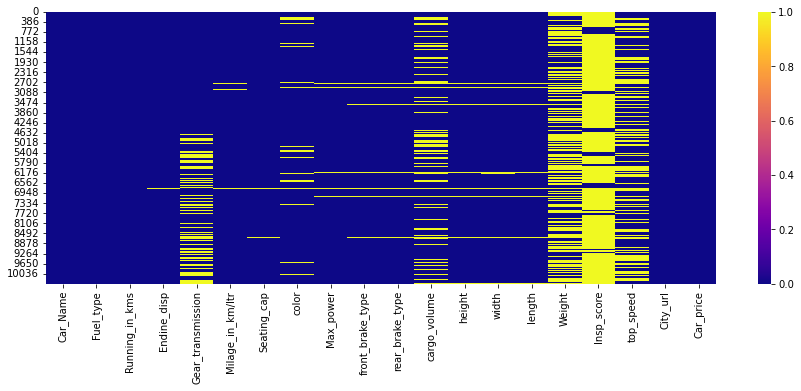

In [12]:
# Let's visualize the null values clearly
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap="plasma")

* By visualization we can clearly say that there are many null values in the dataset.
* In Insp_score column there is more than 80% null values so let's drop this column.

In [13]:
#Dropping unnecessary columns
df.drop(columns = ['Insp_score'], inplace = True)

In [14]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10420 entries, 0 to 10419
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           10420 non-null  object
 1   Fuel_type          10420 non-null  object
 2   Running_in_kms     10420 non-null  object
 3   Endine_disp        10308 non-null  object
 4   Gear_transmission  7929 non-null   object
 5   Milage_in_km/ltr   10192 non-null  object
 6   Seating_cap        10270 non-null  object
 7   color              9767 non-null   object
 8   Max_power          10237 non-null  object
 9   front_brake_type   10171 non-null  object
 10  rear_brake_type    10170 non-null  object
 11  cargo_volume       8076 non-null   object
 12  height             10156 non-null  object
 13  width              10149 non-null  object
 14  length             10156 non-null  object
 15  Weight             5131 non-null   object
 16  top_speed          6682 non-null   objec

* Above is the info about the dataset and i can see some missing values in the dataset. I have to take care of those missing values.
* as well as here, all columns are in object data type, i need to deal with them and convert them into proper datatype.  

In [15]:
#Checking the number of unique values in each columns:
df.nunique().to_frame('Number of Unique Values')

,Number of Unique Values
Car_Name,1370
Fuel_type,5
Running_in_kms,3935
Endine_disp,148
Gear_transmission,2
Milage_in_km/ltr,520
Seating_cap,9
color,388
Max_power,657
front_brake_type,31


In [16]:
#Checking the value counts of each of the columns

for i, j in zip(df.columns, range(1,20)):
    print(f"""{j}. Column '{i}' :
{df[i].value_counts()}
___________________________________
""")

1. Column 'Car_Name' :
2015 Hyundai Grand i10                  77
2016 Hyundai Creta                      74
2017 Hyundai Grand i10                  72
2015 Honda City                         70
2015 Maruti Swift                       69
2016 Hyundai Grand i10                  66
2018 Hyundai i20                        65
2016 Maruti Baleno                      61
2018 Maruti Swift Dzire                 60
2018 Maruti Vitara Brezza               59
2017 Hyundai Creta                      58
2014 Honda City                         58
2018 Hyundai Creta                      57
2016 Maruti Swift                       55
2018 Maruti Baleno                      55
2017 Maruti Baleno                      53
2017 Hyundai i20                        53
2014 Hyundai Grand i10                  50
2017 Honda City                         50
2015 Honda Amaze                        49
2014 Honda Amaze                        49
2018 Hyundai Grand i10                  48
2016 Honda City                

Here we can see,
* Car_name column has year of manufacture, car model and car name all together so we have to separate them.
* Running_in_kms column should be int datatype but it has some string values and ',' in between so let's replace them.
* The column 'Endine_disp' should be continuous column so i will convert it to float datatype.
* In Milage_in_km/ltr column the data type is object so we have to change this to float type.
* In City url column we got urls but it wont help us for further process insted of that we need city name.

### Feature Extraction:

#### Car_Name: 
Since Car_name column has year of manufacture, car model and car name all together so we have to separate them.

In [17]:
#Extracting manufacturing year and car name from Car_Name
df['Manu_year'] = df['Car_Name'].str[0:4]
df['car_name'] = df['Car_Name'].str[4:]
df.drop(columns = 'Car_Name', inplace = True)

In [18]:
df['Car_Brand'] = df.car_name.str.split(' ').str.get(1)
df['Car_Model'] = df.car_name.str.split(' ').str[2:]
df['Car_Model'] = df['Car_Model'].apply(lambda x: ','.join(map(str, x)))
df['Car_Model'] = df['Car_Model'].str.replace(',',' ')
df.drop(columns = 'car_name', inplace = True)

In [19]:
df.head(3)

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,top_speed,City_url,Car_price,Manu_year,Car_Brand,Car_Model
0,Petrol,"89,294 kms",1497,Manual,17.4 kmpl,5,Golden brown,117.6,Ventilated Disc,Drum,510,1495,1695,4440,1436,189 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,"7,65,000",2018,Honda,City
1,Diesel,"55,435 kms",1248,Manual,28.4 kmpl,5,Grey,74.02,Disc,Drum,378,1515,1735,3995,1405Kg,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,"7,45,000",2018,Maruti,Swift Dzire
2,Petrol,"9,386 kms",1197,Manual,22 kmpl,5,White,81.80,Ventilated Disc,Drum,378,1515,1735,3995,1315Kg,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,"6,50,000",2019,Maruti,Swift Dzire


### Running_in_kms:

Since this column should be int datatype but it has some string values and ',' in between so let's replace them.

In [20]:
df['Running_in_kms'] = df['Running_in_kms'].str.replace('kms','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace(',','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace('1 Lakh ','100000')
df['Running_in_kms'] = df['Running_in_kms'].astype('float')

In [21]:
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp           object
Gear_transmission     object
Milage_in_km/ltr      object
Seating_cap           object
color                 object
Max_power             object
front_brake_type      object
rear_brake_type       object
cargo_volume          object
height                object
width                 object
length                object
Weight                object
top_speed             object
City_url              object
Car_price             object
Manu_year             object
Car_Brand             object
Car_Model             object
dtype: object

### Engine_disp:

The column 'Endine_disp' should be continuous column so i will convert it to float datatype.

In [22]:
df.Endine_disp = df.Endine_disp.astype('float')

### Car_price:

The column 'Car_price' should be continuous column so i will convert it to float datatype.

In [23]:
df['Car_price'] = df['Car_price'].str.replace(',','')

In [24]:
df.Car_price = df.Car_price.astype('float')

## Milage_in_km/ltr:


In Milage_in_km/ltr column the data type is object so we have to change this to float type.

In [25]:
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('kmpl','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/kg','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/hr','')

df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].astype('float')

### Converting the data type of columns height, width and length to float datatype:

In [26]:
df['height'] = df['height'].str.replace(',','')
df['height'] = df['height'].str[0:4]
df['width'] = df['width'].str.replace(',','')
df['length'] = df['length'].str.replace(',','')
df.height = df.height.astype('float')
df.width = df.width.astype('float')
df.length = df.length.astype('float')

### Weight:

The datatype of Weight has to be changed to float.

In [27]:
#getting numerical values from Weight column
df['Weight'] = df['Weight'].str.replace(',','')
df['Weight'] = df['Weight'].str[0:4]

df.Weight = df.Weight.astype('float')

### top_speed:

Let's change the datatype of top_speed column to float.

In [28]:
#getting numerical values from top_speed column
df['top_speed'] = df['top_speed'].str[0:3]
df.top_speed = df.top_speed.astype('float')

### City_url:

Let's extract city name from city url column.

In [29]:
#Checking value counts of City_url column
df.City_url.value_counts()

https://www.cardekho.com/used-cars+in+new-delhi    1500
https://www.cardekho.com/used-cars+in+bangalore    1480
https://www.cardekho.com/used-cars+in+delhi-ncr    1480
https://www.cardekho.com/used-cars+in+mumbai       1000
https://www.cardekho.com/used-cars+in+hyderabad     929
https://www.cardekho.com/used-cars+in+pune          905
https://www.cardekho.com/used-cars+in+chennai       881
https://www.cardekho.com/used-cars+in+kolkata       724
https://www.cardekho.com/used-cars+in+ahmedabad     595
https://www.cardekho.com/used-cars+in+noida         473
https://www.cardekho.com/used-cars+in+jaipur        453
Name: City_url, dtype: int64

In [30]:
#Replacing city names from city urls
df['city_name'] = df.City_url.replace('https://www.cardekho.com/used-cars+in+bangalore', 'Bangalore')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+mumbai', 'mumbai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+chennai', 'Chennai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+hyderabad', 'hyderabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+pune', 'pune')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+delhi-ncr', 'delhi-ncr')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+ahmedabad', 'ahmedabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+gurgaon', 'gurgaon')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+noida', 'noida')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+kolkata', 'kolkata')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+jaipur', 'jaipur')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+new-delhi', 'new-delhi')

In [31]:
#Let's check the value count again
df['city_name'].value_counts()

new-delhi    1500
Bangalore    1480
delhi-ncr    1480
mumbai       1000
hyderabad     929
pune          905
Chennai       881
kolkata       724
ahmedabad     595
noida         473
jaipur        453
Name: city_name, dtype: int64

Since we have extracted city names let's drop City_url.

In [32]:
#Dropping unnecessary column
df.drop(columns = 'City_url', inplace = True)

### Seating_cap:

Let's change the data type of seating_cap to float type.

In [33]:
#converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

### Manu_Year:

Let's extract car age from manufactured year.

In [34]:
df.Manu_year = df.Manu_year.astype('float')
df['Car_age'] = 2021 - df['Manu_year']
df.drop(columns = 'Manu_year', inplace = True)

### Max_power:

We have to change the datatype of Max_power column to float datatype.

In [35]:
#getting numerical values from column Max_power and converting them to float type
df['Max_power'] = df['Max_power'].str[0:5]

In [36]:
df['Max_power'].value_counts()

81.80    406
88.5     292
81.86    275
74       244
67.05    239
121.3    196
67.04    192
82       184
78.9     177
140      176
81.83    175
88.7     166
117.3    162
98.6     161
103.2    152
126.2    151
83.1     146
174.3    123
67       123
86.8     116
88.76    115
47.3     113
187.7    113
67.1     110
86.7     103
68.05    101
85.8     101
147.5     99
55.2      95
103.5     86
190       80
88.73     79
91.1      78
138.0     77
113.4     77
117.6     76
108.6     73
70        73
73.9      73
100       72
103.6     71
88.50     65
168.5     64
118.3     64
141       64
118PS     63
53.3      63
126.3     62
68        60
108.5     58
170       58
80 PS     56
138.1     56
62.1      56
184       54
258       54
174.5     52
83.8      51
167.6     51
201.1     50
88.8      50
108.4     49
171.5     48
75        48
177       45
74.02     45
100.6     45
74        44
120       44
83.14     43
46.3      42
84        41
188       39
89.84     37
98.96     34
136       33
116.3     33

In [37]:
df['Max_power'] = df['Max_power'].str.replace('PS','')
df['Max_power'] = df['Max_power'].str.replace('ps','')
df['Max_power'] = df['Max_power'].str.replace('Bh','')
df['Max_power'] = df['Max_power'].str.replace('P','')

df['Max_power'] = df['Max_power'].str.replace('a','')
df['Max_power'] = df['Max_power'].str.replace('[','')
df['Max_power'] = df['Max_power'].str.replace('kW','')
df['Max_power'] = df['Max_power'].str.replace('B','')
df['Max_power'] = df['Max_power'].str.replace('k','')

df['Max_power'] = df['Max_power'].str.replace('hp','')
df['Max_power'] = df['Max_power'].str.replace('h','')

df['Max_power'] = df['Max_power'].str.replace('(','.')
df['Max_power'] = df['Max_power'].str.replace('s','')
df['Max_power'] = df['Max_power'].str.replace('/','.')

In [38]:
df.Max_power = df.Max_power.astype('float')

### front_brake_type:

Let's group the similar entries in this column.

In [39]:
#Checking the value counts of front_brake_type
df['front_brake_type'].value_counts()

Disc                                          6091
Ventilated Disc                               3553
Solid Disc                                     126
Ventilated Discs                               107
Disc & Caliper Type                             61
Disk                                            52
Ventilated discs                                27
Ventilated DIsc                                 25
Multilateral Disc                               21
Vantilated Disc                                 21
Ventilated Disk                                 13
Drum                                            12
Disc,internally ventilated                      10
264mm Ventilated discs                           8
Disc & Drum                                      5
Ventlated Disc                                   5
Ventillated Disc                                 4
Disc, 236 mm                                     4
Single Piston Sliding Caliper, Vented Disc       3
Discs                          

In [40]:
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)

df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("264mm Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Disc,internally ventilated","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Booster assisted ventilated disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated disc","Ventilated Disc",inplace=True)

In [41]:
#Checking the value counts of front_brake_type again
df['front_brake_type'].value_counts()

Disc                                          6278
Ventilated Disc                               3777
Disc & Caliper Type                             61
Multilateral Disc                               21
Drum                                            12
Disc & Drum                                      5
Electric Parking Brake                           3
Caliper Ventilated Disc                          3
Single Piston Sliding Caliper, Vented Disc       3
Disc brakes                                      2
Vacuum assisted hydraulic dual circuit w         2
260mm discs                                      1
ventilated Disc                                  1
Dual Circuit with ABS, ABS with BAS              1
Disc Brakes with Inner cooling                   1
Name: front_brake_type, dtype: int64

### rare_brake_type:

Let's group the similar entries in this column.

In [42]:
#Checking value counts of rare_break_type column
df['rear_brake_type'].value_counts()

Drum                                          7632
Disc                                          1570
Ventilated Disc                                360
Solid Disc                                     228
Leading-Trailing Drum                           72
Discs                                           62
Disc & Caliper Type                             61
Self-Adjusting Drum                             35
Ventilated discs                                25
Ventilated Discs                                24
Drums                                           18
Leading & Trailing Drum                         15
Ventilated Drum                                 14
262mm Disc & Drum Combination                    8
Disc & Drum                                      8
Self Adjusting Drums                             5
Drums 180 mm                                     4
Electric Parking Brake                           3
Single Piston Sliding Caliper, Vented Disc       3
Vacuum assisted hydraulic dual 

In [43]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in Discs","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in disc","Drum",inplace=True)
 

df["rear_brake_type"].replace("Discs","Disc",inplace=True)
df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Disc Brakes","Disc",inplace=True)

df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)

df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)

df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting drums","Self-Adjusting Drum",inplace=True)

### cargo_volume
We have to change the datatype of cargo_volume column to float datatype.

In [44]:
# getting numerical values from column cargo_volume and converting them to float type
df['cargo_volume'] = df['cargo_volume'].str[:4]

In [45]:
df['cargo_volume'] = df['cargo_volume'].str.replace('-','')
df['cargo_volume'] = df['cargo_volume'].str.replace('?','')
df['cargo_volume'] = df['cargo_volume'].str.replace('L','')
df['cargo_volume'] = df['cargo_volume'].str.replace('l','')

In [46]:
df.cargo_volume = df.cargo_volume.astype('float')

In [47]:
# Lets Recheck the value count of each column to see if there are any unwanted entries present in the column in the dataset.

for i, j in zip(df.columns, range(1,20)):
    print(f"""{j}. Column '{i}' :
{df[i].value_counts()}
___________________________________
""")

1. Column 'Fuel_type' :
Petrol               5830
Diesel               4409
CNG                   155
LPG                    16
Electric(Battery)      10
Name: Fuel_type, dtype: int64
___________________________________

2. Column 'Running_in_kms' :
60000.0      174
70000.0      167
65000.0      161
50000.0      148
40000.0      140
80000.0      138
120000.0     131
45000.0      112
35000.0      111
55000.0      100
90000.0       92
100000.0      89
25000.0       85
72000.0       84
62000.0       82
75000.0       81
30000.0       81
52000.0       79
20000.0       79
68000.0       75
58000.0       73
48000.0       72
63000.0       71
110000.0      71
67000.0       70
49000.0       67
42000.0       65
36000.0       64
85000.0       61
19000.0       61
71000.0       59
44000.0       58
56000.0       58
32000.0       57
22000.0       57
15000.0       57
28000.0       57
54000.0       56
10000.0       55
38000.0       54
59000.0       53
78000.0       53
31000.0       52
51000.0       52
61

Now the dataset is good to work let's save this cleaned data set for further assistance.

In [48]:
#saving the cleaned data into csv file
df.to_csv(r"C:\Users\prita\Desktop\PRITAM\Fliprobo Projects\cleaned_data.csv")

In [49]:
#Checking the datatypes of all columns after cleaning
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap          float64
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
cargo_volume         float64
height               float64
width                float64
length               float64
Weight               float64
top_speed            float64
Car_price            float64
Car_Brand             object
Car_Model             object
city_name             object
Car_age              float64
dtype: object

Now in my dataset i have two types of datas.

In [50]:
#Checking unique values of each column
df.nunique()

Fuel_type               5
Running_in_kms       3935
Endine_disp           148
Gear_transmission       2
Milage_in_km/ltr      490
Seating_cap             9
color                 388
Max_power             401
front_brake_type       15
rear_brake_type        17
cargo_volume          174
height                240
width                 226
length                339
Weight                239
top_speed             118
Car_price            1758
Car_Brand              33
Car_Model             286
city_name              11
Car_age                23
dtype: int64

Above are the unique value counts of each column. I don't find anything unnecessary so let's proceed.

### Imputation technique to replace nan values:

In [51]:
#Checking null values in the dataset
df.isnull().sum()

Fuel_type               0
Running_in_kms          0
Endine_disp           112
Gear_transmission    2491
Milage_in_km/ltr      228
Seating_cap           150
color                 653
Max_power             183
front_brake_type      249
rear_brake_type       250
cargo_volume         2344
height                264
width                 271
length                264
Weight               5289
top_speed            3738
Car_price               0
Car_Brand               0
Car_Model               0
city_name               0
Car_age                 0
dtype: int64

* We have to replace the nan values in continuous columns by there mean and categorical columns with it's mode.
* In the numerical columns with null values has to be replaced by median.

In [52]:
#Replacing nan values
for col in ['Endine_disp','Milage_in_km/ltr','Max_power','cargo_volume','height','width','Weight','top_speed']:
    df[col] = df[col].fillna(df[col].median())
for col in ['length']:
    df[col] = df[col].fillna(df[col].mean())
for col1 in ['Gear_transmission','Seating_cap','color','front_brake_type','rear_brake_type']:
    df[col1] = df[col1].fillna(df[col1].mode()[0])

In [53]:
#Checking null values in the dataset again
df.isnull().sum()

Fuel_type            0
Running_in_kms       0
Endine_disp          0
Gear_transmission    0
Milage_in_km/ltr     0
Seating_cap          0
color                0
Max_power            0
front_brake_type     0
rear_brake_type      0
cargo_volume         0
height               0
width                0
length               0
Weight               0
top_speed            0
Car_price            0
Car_Brand            0
Car_Model            0
city_name            0
Car_age              0
dtype: int64

<AxesSubplot:>

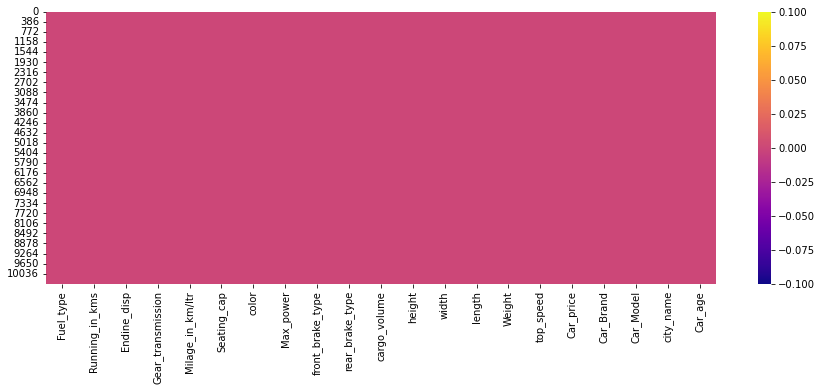

In [54]:
# Let's visualize the null values clearly
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap="plasma")

Great we have replaced all null values successfully.

In [55]:
#Printing the dataset
df.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,top_speed,Car_price,Car_Brand,Car_Model,city_name,Car_age
0,Petrol,89294.0,1497.0,Manual,17.40,5.0,Golden brown,117.60,Ventilated Disc,Drum,510.0,1495.0,1695.0,4440.0,1436.0,189.0,765000.0,Honda,City,ahmedabad,3.0
1,Diesel,55435.0,1248.0,Manual,28.40,5.0,Grey,74.02,Disc,Drum,378.0,1515.0,1735.0,3995.0,1405.0,171.0,745000.0,Maruti,Swift Dzire,ahmedabad,3.0
2,Petrol,9386.0,1197.0,Manual,22.00,5.0,White,81.80,Ventilated Disc,Drum,378.0,1515.0,1735.0,3995.0,1315.0,171.0,650000.0,Maruti,Swift Dzire,ahmedabad,2.0
3,Diesel,138000.0,1199.0,Manual,22.07,5.0,Black,73.90,Disc,Drum,352.0,1453.0,1682.0,3970.0,1670.0,164.0,185000.0,Volkswagen,Polo,ahmedabad,10.0
4,Petrol,28679.0,1199.0,Manual,18.60,5.0,Red,88.50,Disc,Drum,420.0,1498.0,1695.0,3995.0,1670.0,171.0,490000.0,Honda,Amaze,ahmedabad,7.0


In [56]:
#Checking description of data set
df.describe()

,Running_in_kms,Endine_disp,Milage_in_km/ltr,Seating_cap,Max_power,cargo_volume,height,width,length,Weight,top_speed,Car_price,Car_age
count,1.042000e+04,10420.000000,10420.000000,10420.000000,10420.000000,10420.000000,10420.000000,10420.000000,10420.000000,10420.000000,10420.000000,1.042000e+04,10420.000000
mean,5.568223e+04,1508.032246,19.076964,5.255758,108.397369,368.998944,1571.833877,1740.083589,4153.388440,1720.435029,175.051727,9.667250e+05,5.688196
std,4.118807e+04,530.252690,4.386476,0.739738,49.412626,122.864589,117.735968,134.497255,417.394079,339.057617,23.273655,1.212284e+06,3.294980
min,6.000000e+02,624.000000,0.000000,2.000000,25.400000,29.000000,1281.000000,1410.000000,3099.000000,785.000000,80.000000,3.500000e+04,-1.000000
25%,3.100000e+04,1197.000000,16.730000,5.000000,78.900000,295.000000,1490.000000,1680.000000,3840.000000,1670.000000,165.000000,3.750000e+05,3.000000
50%,5.200000e+04,1364.000000,18.900000,5.000000,88.700000,352.000000,1525.000000,1730.000000,3995.000000,1670.000000,171.000000,5.760000e+05,5.000000
75%,7.259175e+04,1598.000000,21.500000,5.000000,126.200000,460.000000,1640.000000,1790.000000,4440.000000,1670.000000,180.000000,9.750000e+05,8.000000
max,1.900000e+06,5972.000000,120.000000,14.000000,576.600000,1780.000000,2055.000000,2220.000000,5453.000000,3350.000000,275.000000,1.550000e+07,21.000000


Above is the statistics about the datasets.The mean and the 2nd quantile values are almost same so the skewness and outliers are less in number.

### Visualization:

### Univariate Analysis:

In [57]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'Car_Model', 'city_name']


Above are the list of categorical columns.

In [58]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Running_in_kms', 'Endine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'cargo_volume', 'height', 'width', 'length', 'Weight', 'top_speed', 'Car_price', 'Car_age']


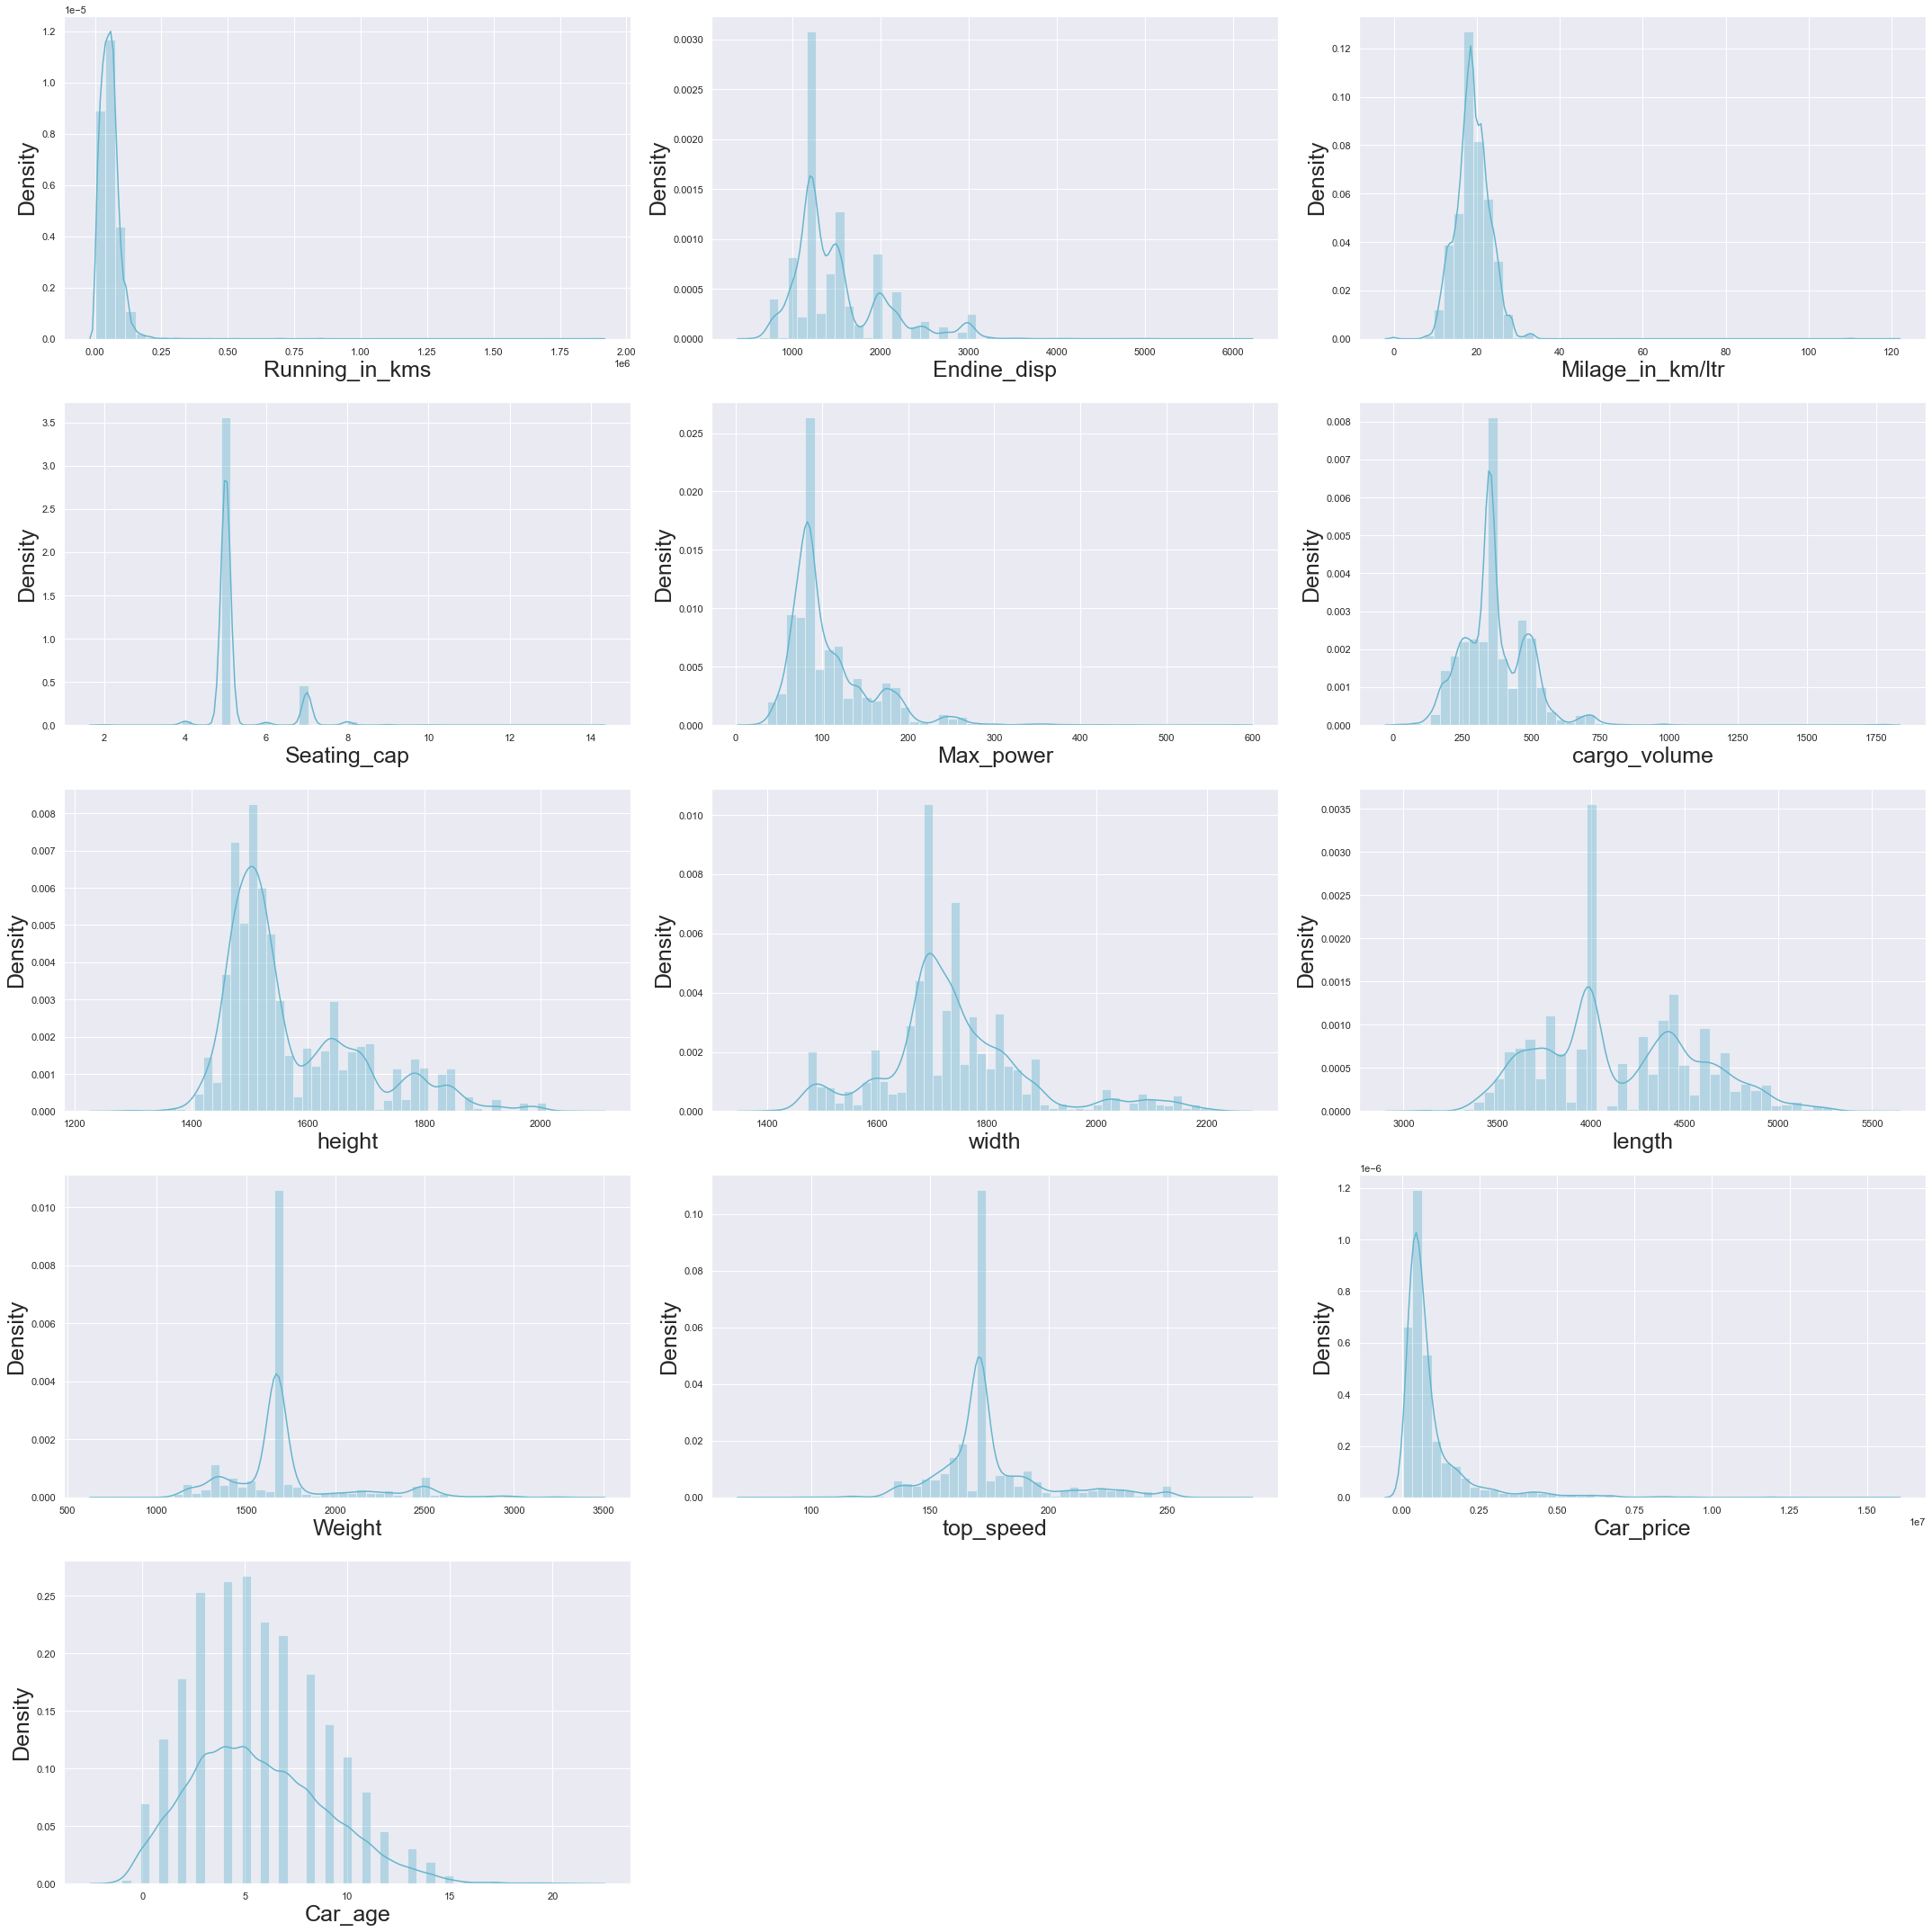

In [59]:
#Distribution plot for all numerical columns
sns.set(style="darkgrid")

plt.figure(figsize = (30,30))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=13:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column],color='c')
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
    plotnumber+=1
plt.tight_layout()

There is skewness in almost all numerical columns.

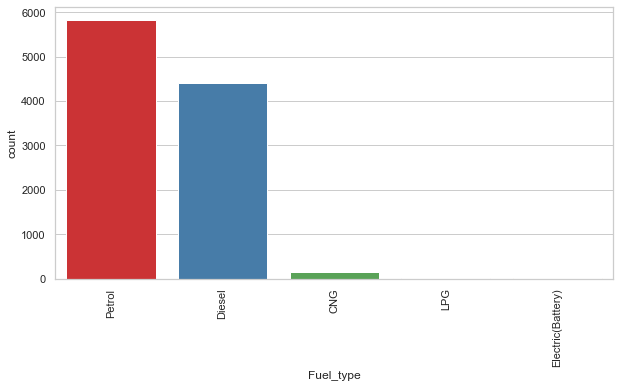

In [60]:
#Count plot for Fuel_type column
sns.set(style="whitegrid")

plt.figure(figsize=[10,5])
sns.countplot(df['Fuel_type'],palette = 'Set1')
plt.xticks(rotation=90);

* Maximum cars are petrol driven followed by diesel.
* CNG, LPG & Electric driven car are very less.

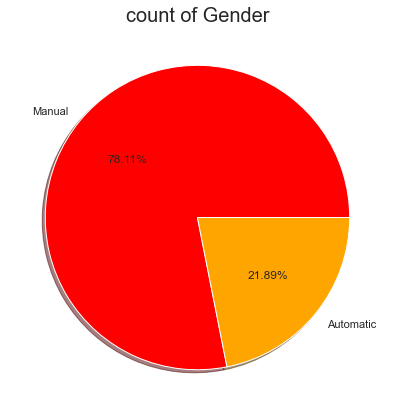

In [61]:
#Count plot for Gear_transmission column

labels='Manual','Automatic'
fig, ax = plt.subplots(figsize=(7,7))
colors = ["red","orange"]
ax.pie(df['Gear_transmission'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title('count of Gender',fontsize=20)
plt.show()

* Maximum cars are with Manual gear transmission (almost 80%).

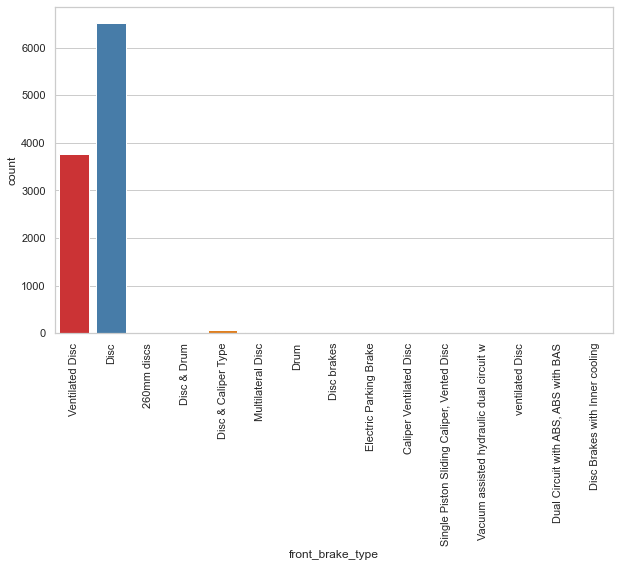

In [62]:
#Count plot for front_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['front_brake_type'], palette = 'Set1')
plt.xticks(rotation=90);

* Disc front brake cars are more in number followed by Ventilated Disc.

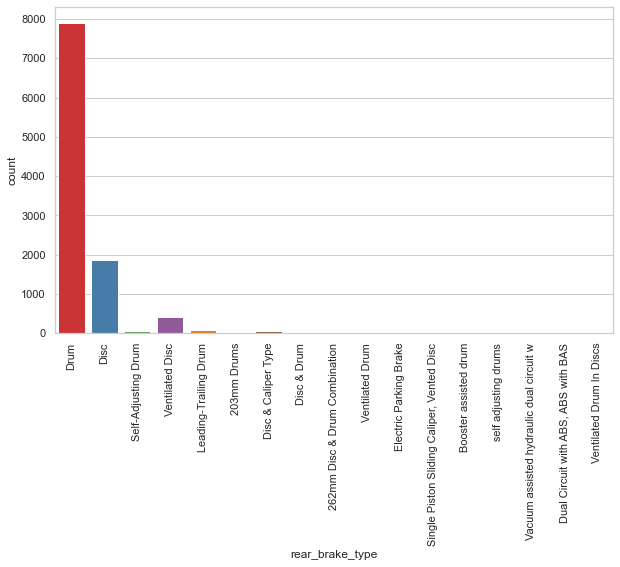

In [63]:
#Count plot for rear_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['rear_brake_type'], palette = 'Set1')
plt.xticks(rotation=90);

* most cars have Drum rare break.

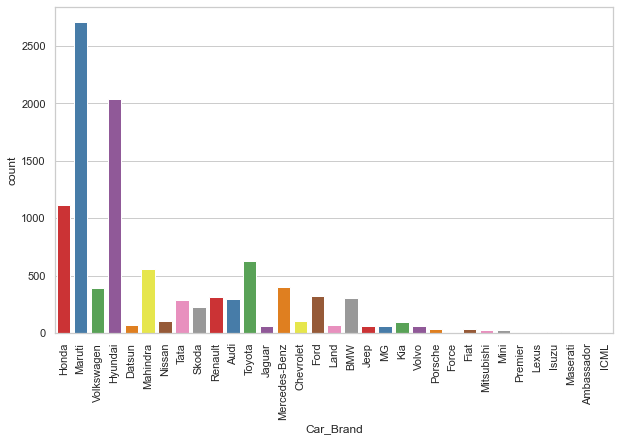

In [64]:
#Count plot for Car_Brand column
plt.figure(figsize=[10,6])
sns.countplot(df['Car_Brand'], palette = 'Set1')
plt.xticks(rotation=90);

* Maximum cars under sale are Maruti followed by Hyundai.

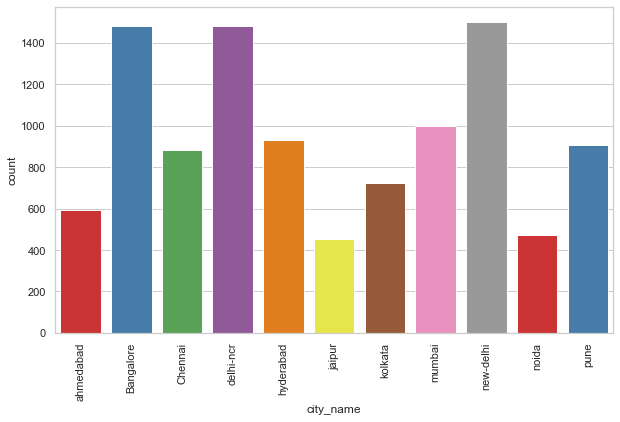

In [65]:
#Count plot for city_name column
plt.figure(figsize=[10,6])
sns.countplot(df['city_name'], palette = 'Set1')
plt.xticks(rotation=90);

* In Bangalore,delhi-ncr,mumbai and new-delhi we can find maximum cars for sale. Since these are most populated places.

### Bivariate Analysis:

In [66]:
col=['Running_in_kms', 'Endine_disp', 'Milage_in_km/ltr', 'Max_power', 'height', 'width', 
     'length', 'Weight', 'top_speed','cargo_volume']

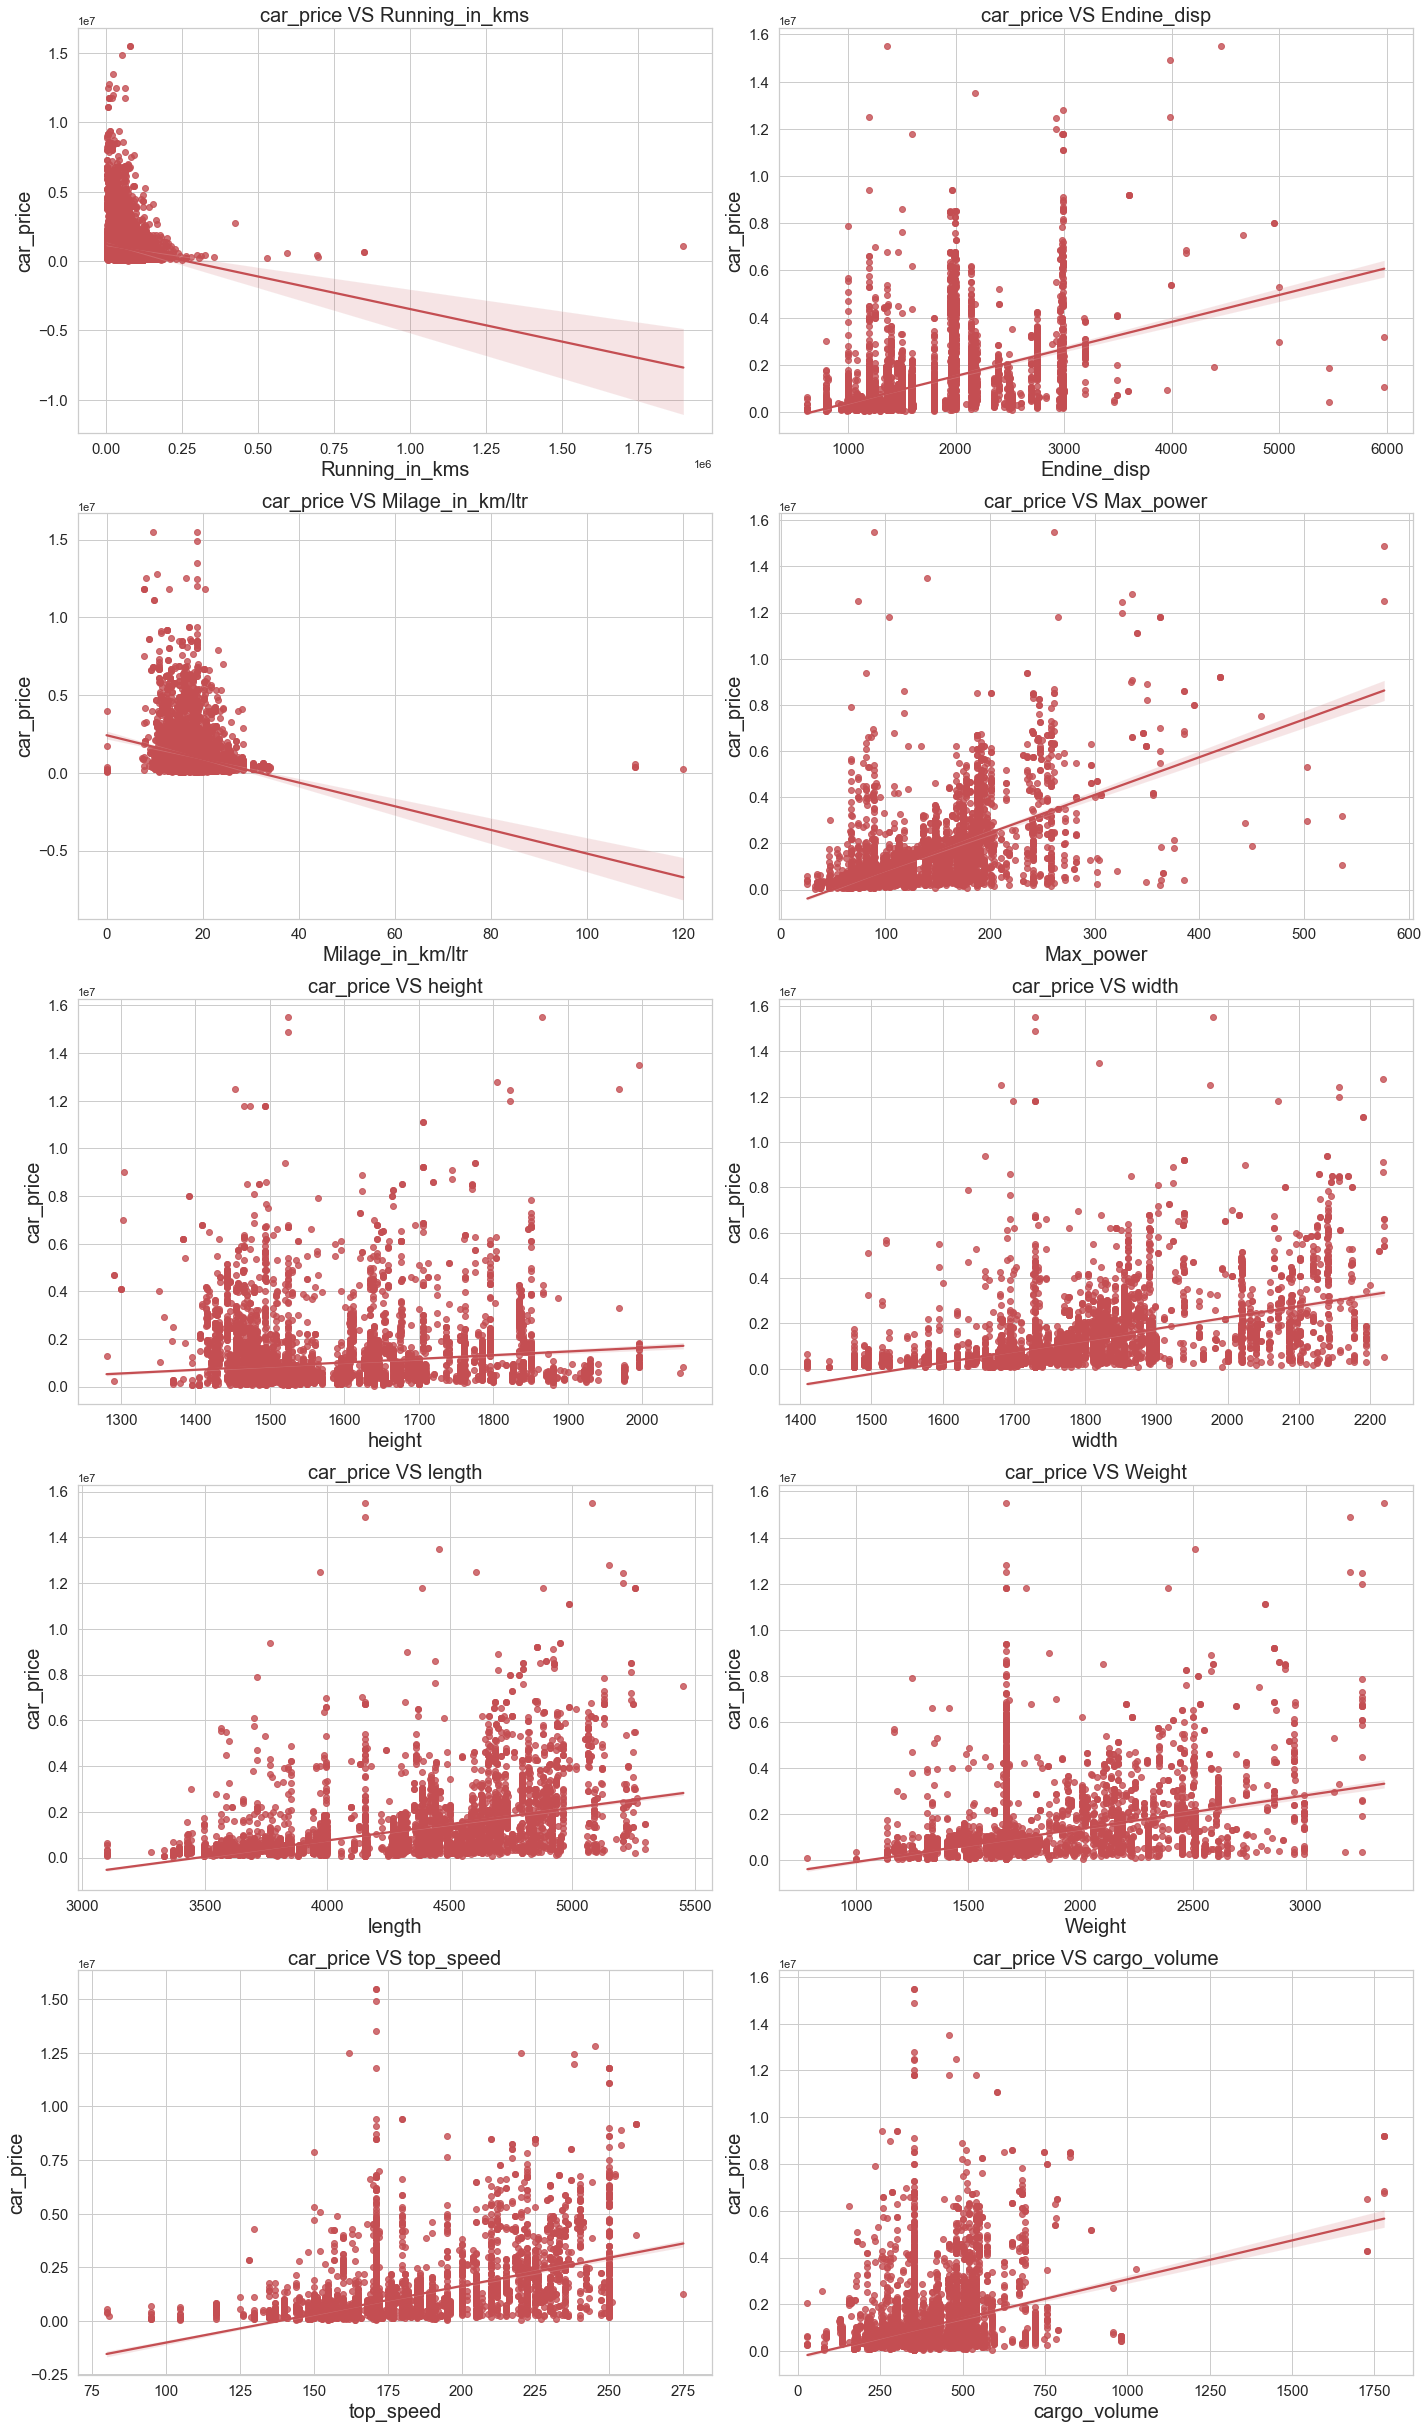

In [67]:
#regplot for numerical columns
plt.figure(figsize=(20,40))
for i in range(len(col)):
    plt.subplot(6,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['Car_price'],color="r")
    plt.title(f"car_price VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

**Observations:**

- Maximum cars are having below 20k driven kms. And car price is high for less driven cars.
- Maximum cars are having 1000-3000 Endine_disp. And car price is high for higher Endine_disp.
- Maximum cars are having milage of 10-30kms. And milage has no proper relation with car price.
- As Max_power is increasing car price is also increasing.
- Car_price has no proper relation with height.
- As the width is increasing car price is also increasing.
- As length is increasing car price is also increasing.
- Weight also directly propotional with car price.
- As top_speed is increasing car price is also increasing.
- cargo_volume is alos directly propotional to the price of car.

In [68]:
col1=['Seating_cap','Car_age']

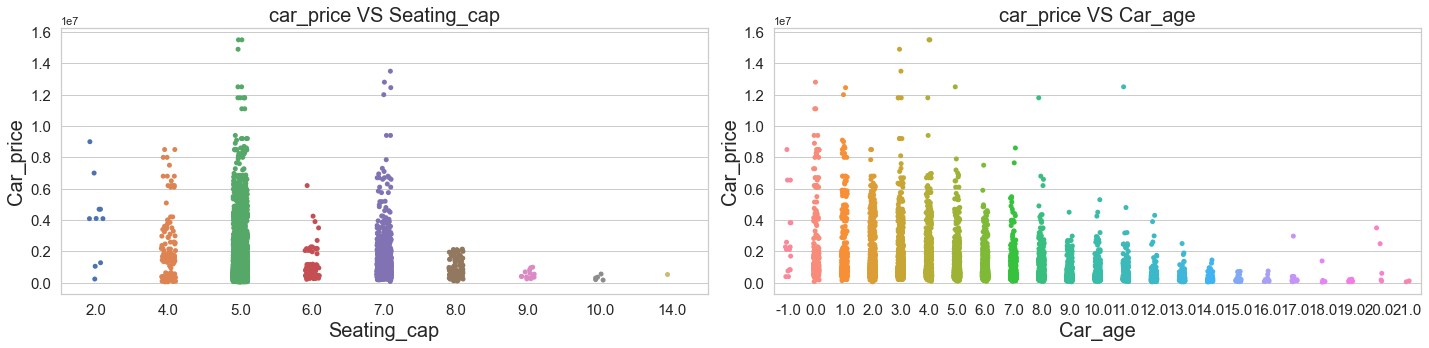

In [69]:
#stripplot for numerical columns
plt.figure(figsize=(20,5))
for i in range(len(col1)):
    plt.subplot(1,2,i+1)
    sns.stripplot(x=df[col1[i]] , y=df['Car_price'])
    plt.title(f"car_price VS {col1[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col1[i],fontsize = 20)
    plt.ylabel('Car_price',fontsize = 20)
    plt.tight_layout()

- Cars with 5, 7 & 4 seats are having highest price.
- As the age of the car increases the car price decreases.

In [70]:
col2=['Fuel_type', 'Gear_transmission', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'city_name']

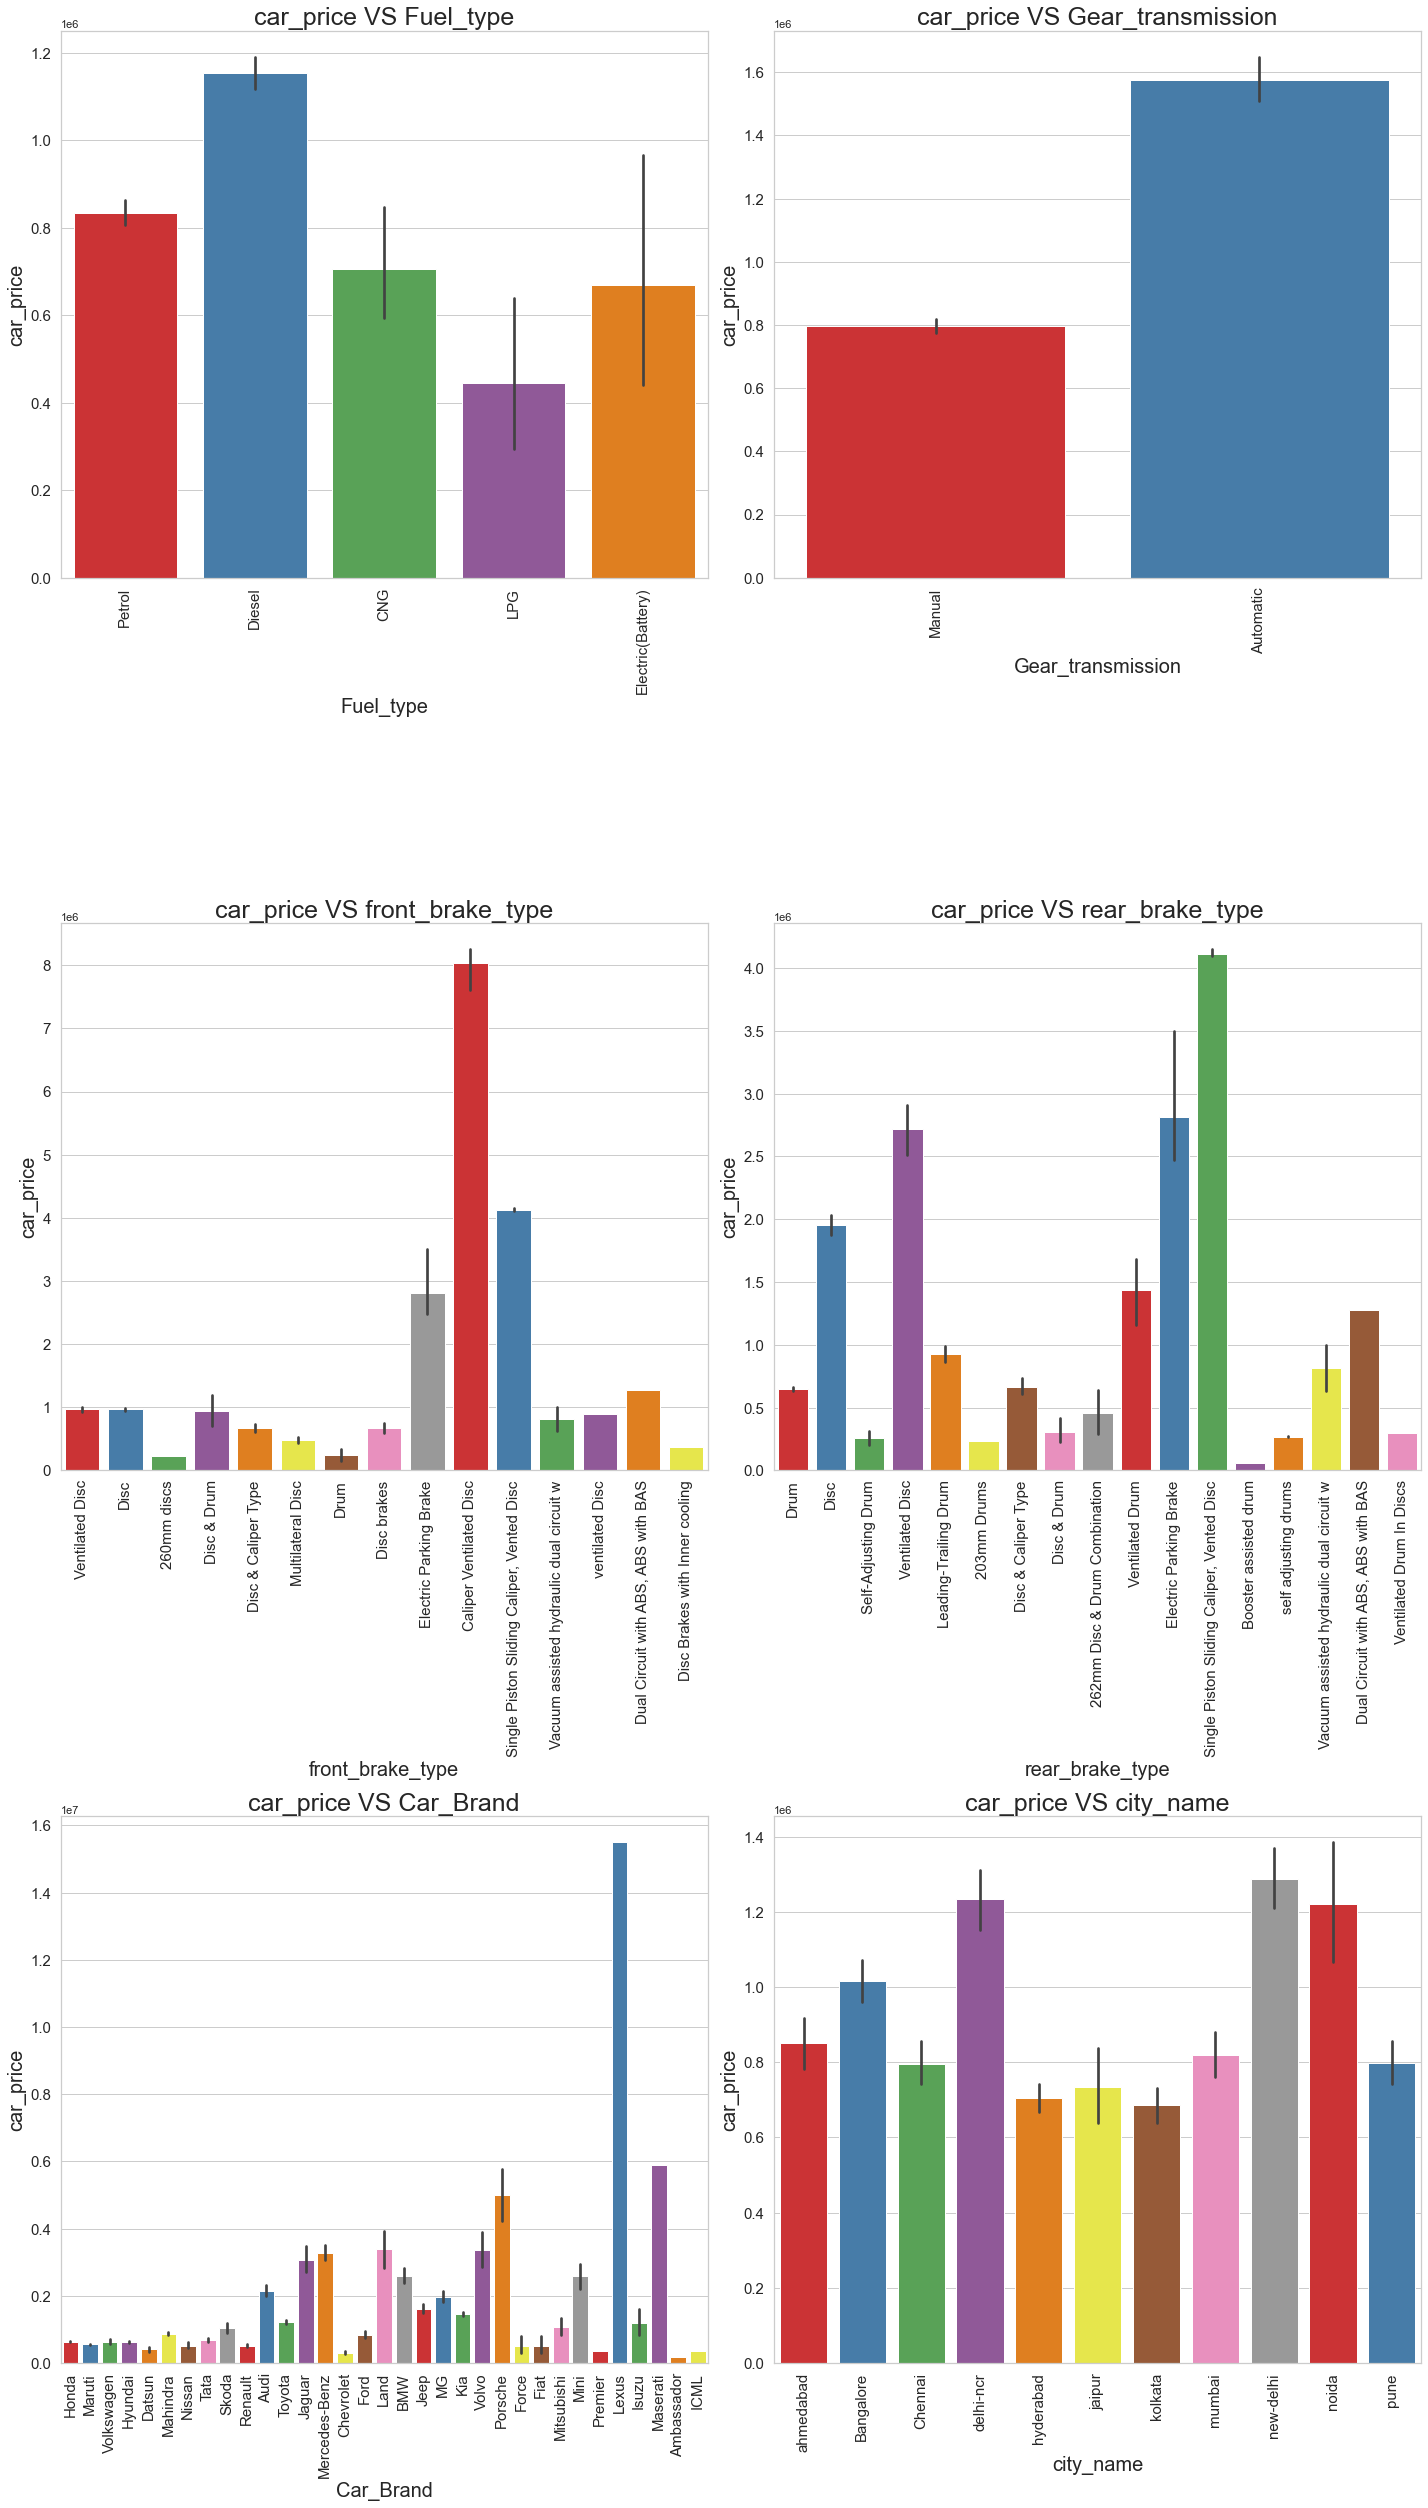

In [71]:
#Bar plot for all categorical columns
plt.figure(figsize=(20,35))
for i in range(len(col2)):
    plt.subplot(3,2,i+1)
    sns.barplot(y=df['Car_price'],x=df[col2[i]], palette = 'Set1')
    plt.title(f"car_price VS {col2[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(col2[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

**Observations:**

- For Diesel, Petrol & Electric cars the price is high compared to LPG and CNG.
- Cars with automatic gear are costlier than manual gear cars.
- Cars with Caliper vantilated front disc break are costlier compared to other cars.
- Cars with Single piston sliding caliper, Vented rear disc braek are costlier compared to other cars.
- Lexus brand cars are having highset sale price. (Lexus is the luxury vehicle division of the Japanese automaker Toyota)
- In new-delhi, delhi-ncr, noida & Bangalore car prices are high as they are highly populated cities.

In [72]:
df.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,top_speed,Car_price,Car_Brand,Car_Model,city_name,Car_age
0,Petrol,89294.0,1497.0,Manual,17.40,5.0,Golden brown,117.60,Ventilated Disc,Drum,510.0,1495.0,1695.0,4440.0,1436.0,189.0,765000.0,Honda,City,ahmedabad,3.0
1,Diesel,55435.0,1248.0,Manual,28.40,5.0,Grey,74.02,Disc,Drum,378.0,1515.0,1735.0,3995.0,1405.0,171.0,745000.0,Maruti,Swift Dzire,ahmedabad,3.0
2,Petrol,9386.0,1197.0,Manual,22.00,5.0,White,81.80,Ventilated Disc,Drum,378.0,1515.0,1735.0,3995.0,1315.0,171.0,650000.0,Maruti,Swift Dzire,ahmedabad,2.0
3,Diesel,138000.0,1199.0,Manual,22.07,5.0,Black,73.90,Disc,Drum,352.0,1453.0,1682.0,3970.0,1670.0,164.0,185000.0,Volkswagen,Polo,ahmedabad,10.0
4,Petrol,28679.0,1199.0,Manual,18.60,5.0,Red,88.50,Disc,Drum,420.0,1498.0,1695.0,3995.0,1670.0,171.0,490000.0,Honda,Amaze,ahmedabad,7.0


### Checking for outliers:

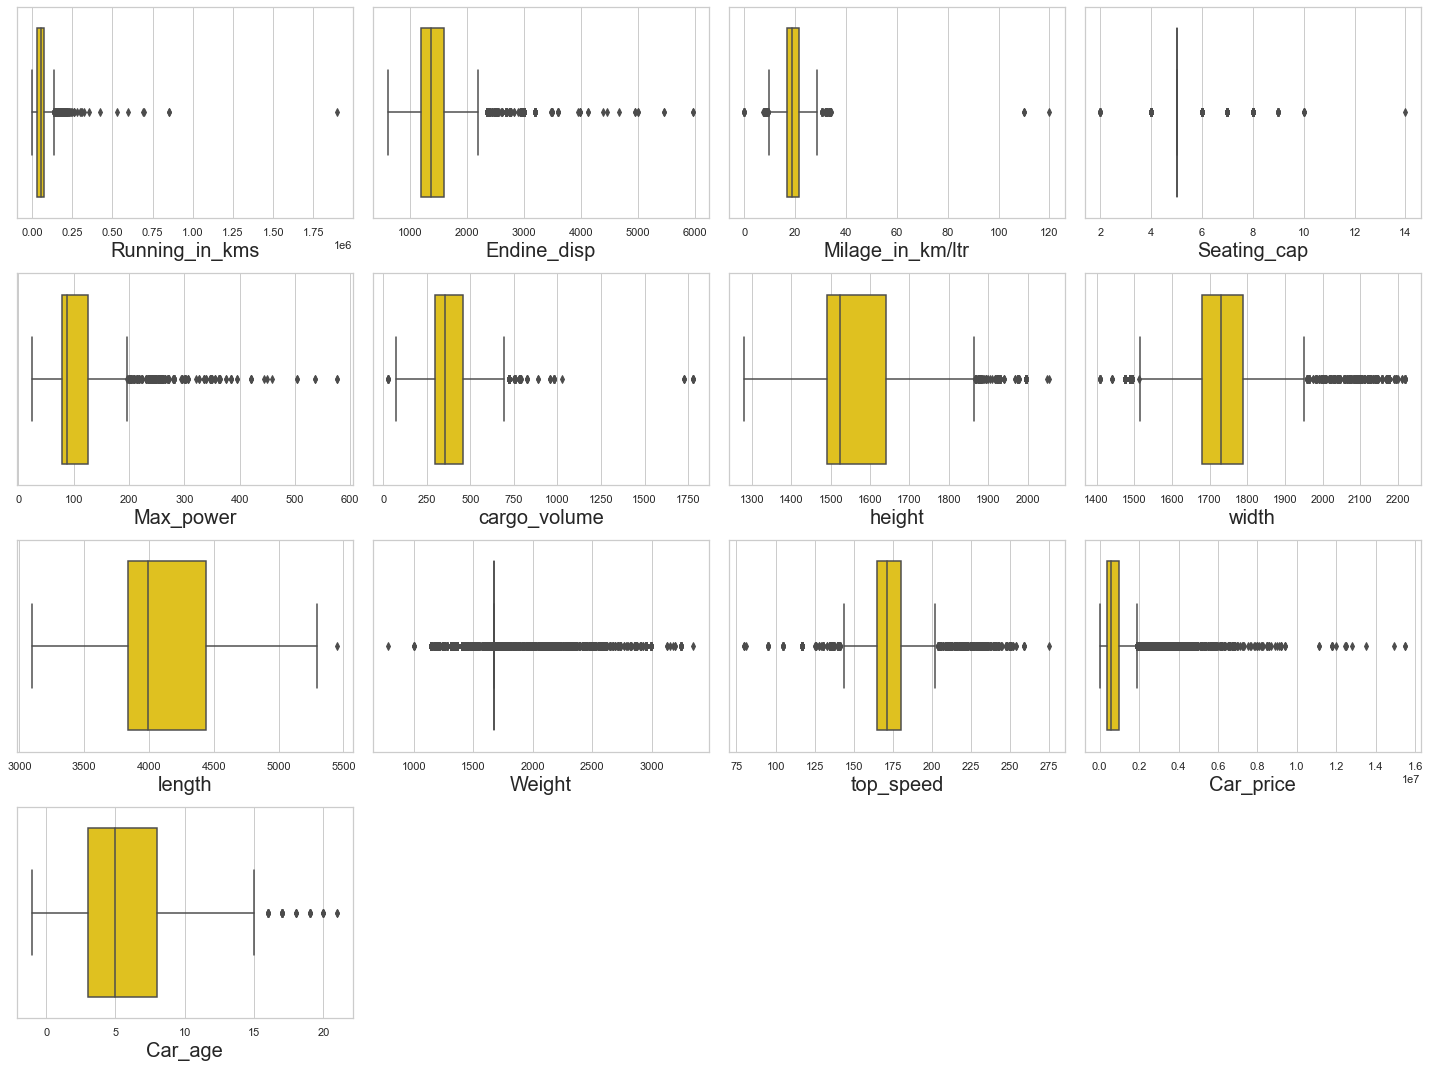

In [73]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in all columns except length. Since car_price is our target we should not remove outliers from it.

### Removing Outliers:

In [74]:
df.shape

(10420, 21)

### i) Zscore method:

In [75]:
#Features having outliers 
features=df[['Running_in_kms', 'Endine_disp', 'Milage_in_km/ltr', 'Seating_cap',
             'Max_power','cargo_volume', 'height', 'width', 'Weight', 'top_speed', 'Car_age']]

Above are the list of columns with outliers in the dataset.

In [76]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,top_speed,Car_price,Car_Brand,Car_Model,city_name,Car_age
0,Petrol,89294.0,1497.0,Manual,17.40,5.0,Golden brown,117.60,Ventilated Disc,Drum,510.0,1495.0,1695.0,4440.0,1436.0,189.0,765000.0,Honda,City,ahmedabad,3.0
1,Diesel,55435.0,1248.0,Manual,28.40,5.0,Grey,74.02,Disc,Drum,378.0,1515.0,1735.0,3995.0,1405.0,171.0,745000.0,Maruti,Swift Dzire,ahmedabad,3.0
2,Petrol,9386.0,1197.0,Manual,22.00,5.0,White,81.80,Ventilated Disc,Drum,378.0,1515.0,1735.0,3995.0,1315.0,171.0,650000.0,Maruti,Swift Dzire,ahmedabad,2.0
3,Diesel,138000.0,1199.0,Manual,22.07,5.0,Black,73.90,Disc,Drum,352.0,1453.0,1682.0,3970.0,1670.0,164.0,185000.0,Volkswagen,Polo,ahmedabad,10.0
4,Petrol,28679.0,1199.0,Manual,18.60,5.0,Red,88.50,Disc,Drum,420.0,1498.0,1695.0,3995.0,1670.0,171.0,490000.0,Honda,Amaze,ahmedabad,7.0


In [77]:
#Checking shape of new dataset
df_new.shape

(9632, 21)

* In my new dataset i have 9632 rows and 21 columns.
* In my old dataset i have 10420 rows and 21 columns.

In [78]:
#Checking dataloss in zscore method
Dataloss = (((10420-9632)/10420)*100)
Dataloss

7.562380038387715

In Z-score method the data loss is less than 10% still let me have a look into IQR method to remove outliers.

In [79]:
df_new['Car_price'].head()

0    765000.0
1    745000.0
2    650000.0
3    185000.0
4    490000.0
Name: Car_price, dtype: float64

### ii) IQR method:

In [80]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness of the dataset using IQR method.

In [81]:
#Checking shape of new dataset
df_1.shape

(4054, 21)

In my new dataset i have 4054 rows and 21 columns.

In [82]:
#Checking shape of old dataset
df.shape

(10420, 21)

In my old dataset i have 10420 rows and 21 columns.

In [83]:
#Checking dataloss in IQR method of the dataset
Dataloss = (((10420-4054)/10420)*100)
Dataloss

61.09404990403071

In IQR method the data loss is more than 50% so let me stick on to Z-score method itself.

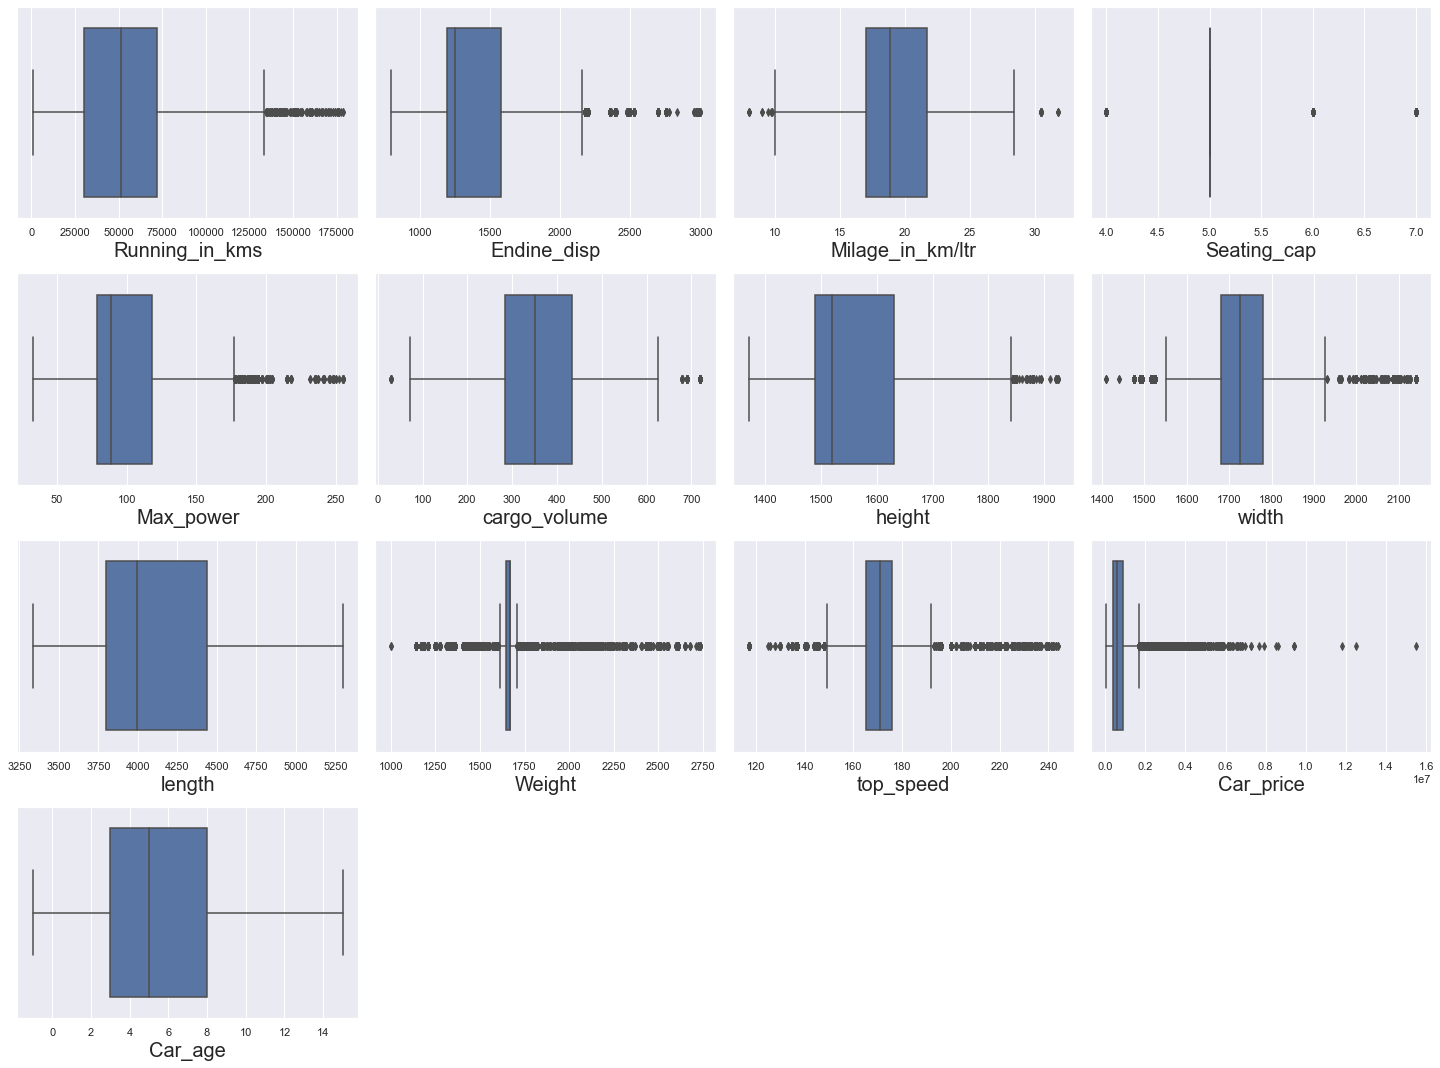

In [84]:
# Checking if the outliers is reduced or not
sns.set(style="darkgrid")

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df_new[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Outliers has been reduced in all the columns.

In [85]:
df_new['Car_price'].head()

0    765000.0
1    745000.0
2    650000.0
3    185000.0
4    490000.0
Name: Car_price, dtype: float64

### Checking for skewness:

In [86]:
df_new.skew().sort_values()

Milage_in_km/ltr    0.094559
length              0.265282
Car_age             0.415415
cargo_volume        0.419293
width               0.639991
Running_in_kms      0.673268
top_speed           1.072498
Max_power           1.174968
height              1.204095
Weight              1.253851
Endine_disp         1.300653
Seating_cap         2.441584
Car_price           3.819616
dtype: float64

* I can see that some of our columns have skewness (more than +0.5 and less than -0.5). 
* So we have to remove this skewness. Since car_price is my target no need to remove skewness in this column.

### Removing skewness:

In [87]:
fea = ['width','Running_in_kms','top_speed','Max_power','height','Weight','Endine_disp','Seating_cap']

In [88]:
#Lets treat the skewness
for index in df_new[fea].skew().index:
    
    if df_new[fea].skew().loc[index]>0.5:
        df_new[index]=np.log1p(df_new[index])
        
        if df_new[fea].skew().loc[index]<-0.5:
            df_new[index]=np.square(df_new[index])

In [89]:
#Checking skewness again
df_new.skew().sort_values()

Running_in_kms     -1.109792
Milage_in_km/ltr    0.094559
length              0.265282
width               0.312991
Car_age             0.415415
cargo_volume        0.419293
Max_power           0.450610
Endine_disp         0.527882
top_speed           0.546231
Weight              0.550074
height              1.081969
Seating_cap         2.348428
Car_price           3.819616
dtype: float64

In all the columns skewness has reduced.

### Label Encoding:

In [90]:
# Separating categorical columns in df_new
cat_col=[]

for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
        
print(cat_col)

['Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'Car_Model', 'city_name']


Above are the list of categorical columns in df_new.

In [91]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [92]:
df_new[cat_col].head()

,Fuel_type,Gear_transmission,color,front_brake_type,rear_brake_type,Car_Brand,Car_Model,city_name
0,4,1,125,8,6,7,56,2
1,1,1,129,1,6,17,189,2
2,4,1,361,8,6,17,189,2
3,1,1,31,1,6,28,151,2
4,4,1,268,1,6,7,23,2


Using label encoder i have encoded the categorical columns.

### Checking correlation using heat map:

In [93]:
cor=df_new.corr()
cor

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,top_speed,Car_price,Car_Brand,Car_Model,city_name,Car_age
Fuel_type,1.000000,-0.121066,-0.225045,0.046286,-0.060650,-0.143851,-0.020558,-0.160977,-0.045624,0.027410,-0.107138,-0.123968,-0.206969,-0.193709,-0.190916,-0.113389,-0.133779,-0.041654,-0.028092,-0.033464,-0.000987
Running_in_kms,-0.121066,1.000000,0.131031,0.076751,0.016178,0.121732,0.067031,-0.017635,0.140248,0.033283,0.048271,0.033360,-0.003987,0.062338,0.123591,-0.028986,-0.246633,0.020870,0.037328,-0.045092,0.509005
Endine_disp,-0.225045,0.131031,1.000000,-0.213894,-0.581012,0.439460,0.011763,0.873803,0.080676,-0.253346,0.507408,0.368093,0.763522,0.849068,0.721986,0.572121,0.444694,0.046715,-0.048219,0.007602,0.023486
Gear_transmission,0.046286,0.076751,-0.213894,1.000000,0.173965,-0.015053,0.018093,-0.283352,0.018036,0.116551,-0.146352,-0.025208,-0.229765,-0.212136,-0.143710,-0.232958,-0.261993,0.035246,0.064819,0.126761,0.094102
Milage_in_km/ltr,-0.060650,0.016178,-0.581012,0.173965,1.000000,-0.306181,-0.010653,-0.577511,0.021338,0.194154,-0.300177,-0.281782,-0.403059,-0.497934,-0.506983,-0.299330,-0.270749,-0.015485,0.042375,0.009263,-0.138487
Seating_cap,-0.143851,0.121732,0.439460,-0.015053,-0.306181,1.000000,0.034649,0.255524,0.049390,-0.017172,-0.006936,0.654729,0.249540,0.347800,0.495621,-0.073899,0.105684,0.211836,0.039145,-0.013345,-0.031528
color,-0.020558,0.067031,0.011763,0.018093,-0.010653,0.034649,1.000000,-0.025320,0.011759,-0.008983,0.004448,0.025515,-0.011286,-0.008796,0.029260,-0.040488,-0.012297,-0.019436,0.045901,0.012742,0.029470
Max_power,-0.160977,-0.017635,0.873803,-0.283352,-0.577511,0.255524,-0.025320,1.000000,-0.000887,-0.336333,0.554809,0.233258,0.818603,0.864480,0.638602,0.732333,0.563069,-0.082782,-0.072615,0.016574,-0.112433
front_brake_type,-0.045624,0.140248,0.080676,0.018036,0.021338,0.049390,0.011759,-0.000887,1.000000,0.189365,-0.035331,0.099619,-0.025845,0.043457,-0.040098,0.029763,-0.033240,0.050707,-0.022879,0.011904,0.235259
rear_brake_type,0.027410,0.033283,-0.253346,0.116551,0.194154,-0.017172,-0.008983,-0.336333,0.189365,1.000000,-0.256953,-0.016105,-0.257723,-0.276726,-0.146843,-0.281553,-0.198809,-0.005262,-0.082586,0.009815,0.042229


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

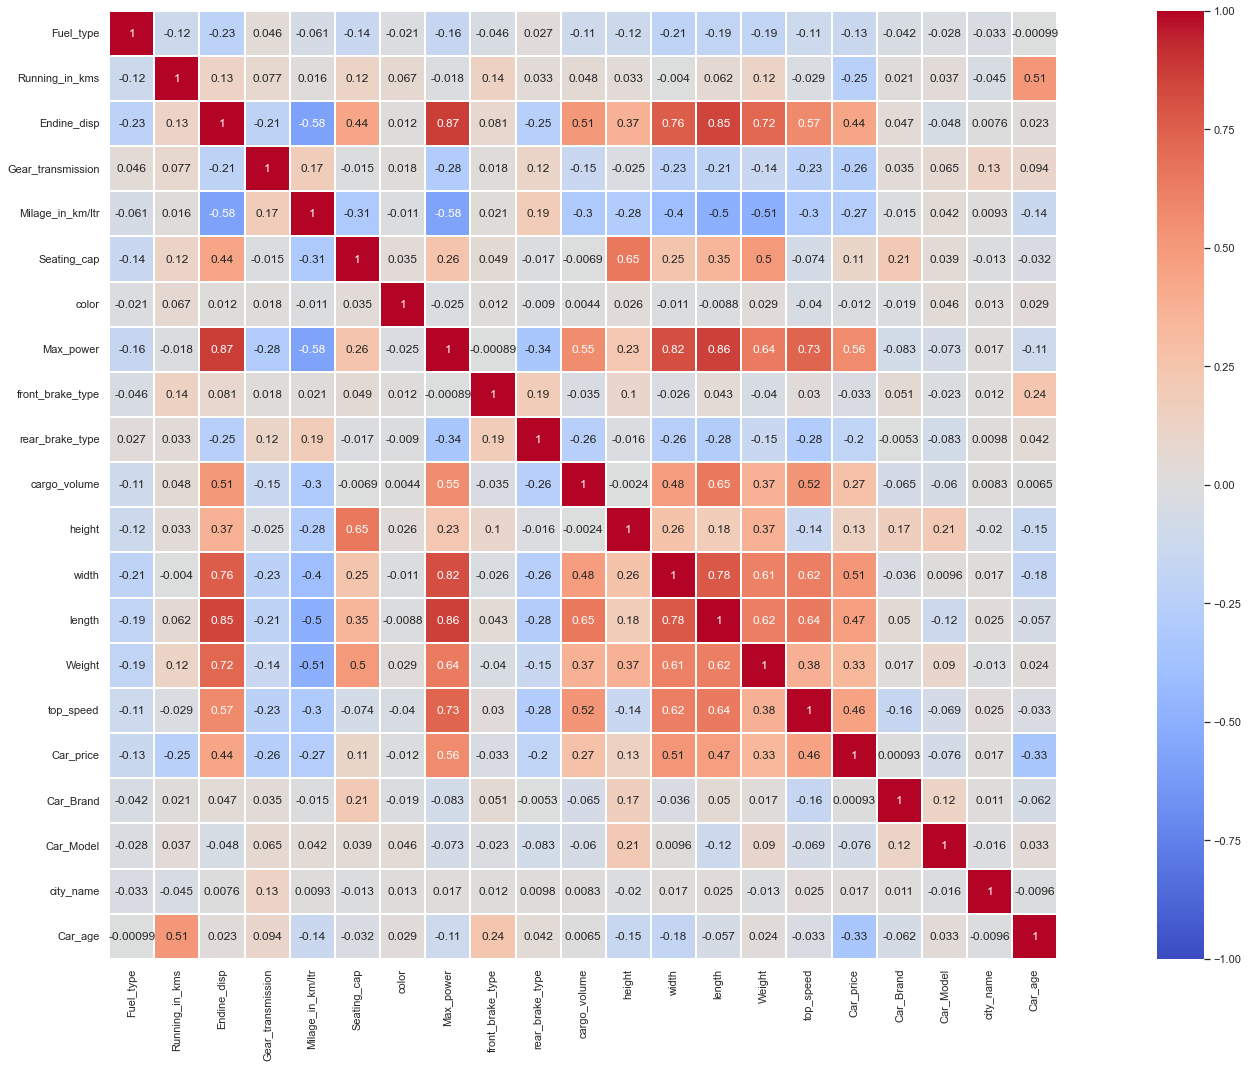

In [94]:
corr = df_new.corr()
plt.figure(figsize = (28,15))
sns.heatmap(corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1,cmap="coolwarm")
plt.tight_layout()

* I can notice there is multicolinearity issue in the dataset. So we have to use VIF to remove multicolinearity.

Let's visualize the correlation of all the features with target to get better insight.

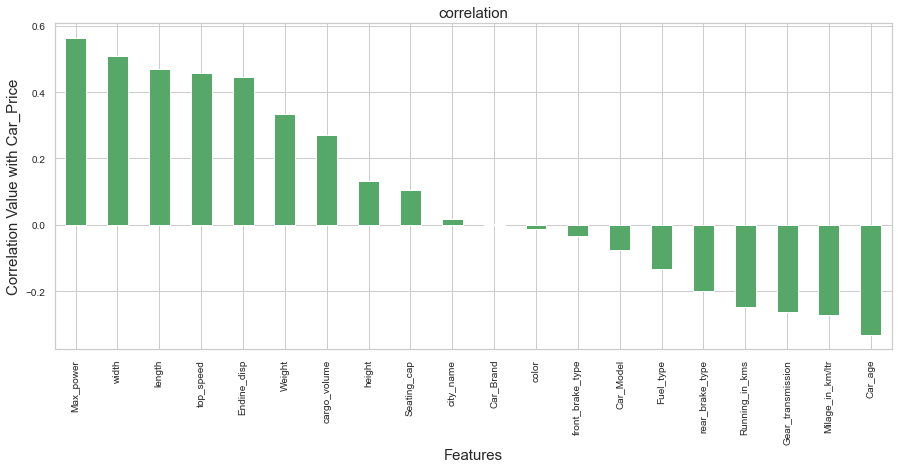

In [95]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,6))
df_new.corr()['Car_price'].sort_values(ascending=False).drop(['Car_price']).plot(kind='bar',color='g')

plt.title('correlation',fontsize=15)
plt.xlabel('Features',fontsize=15)
plt.ylabel("Correlation Value with Car_Price",fontsize=15)

plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)

plt.show()

color is less correlated with target. But will keep it and continue.

### Separating Features and Target:

In [96]:
x = df_new.drop("Car_price",axis=1)
y = df_new["Car_price"]

I have separated my target and independent columns.

In [97]:
y.head()

0    765000.0
1    745000.0
2    650000.0
3    185000.0
4    490000.0
Name: Car_price, dtype: float64

### Scaling the data using Standard scaler:

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my data using Standard scaler.

In [99]:
X.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,top_speed,Car_Brand,Car_Model,city_name,Car_age
0,0.861901,0.982545,0.293436,0.517077,-0.528544,-0.3245,-0.949103,0.582345,1.335702,0.277333,1.352950,-0.643496,-0.247665,0.817898,-0.909635,0.811492,-0.928299,-0.933375,-0.824844,-0.815925
1,-1.135973,0.308420,-0.371087,0.517077,2.493975,-0.3245,-0.916176,-0.778381,-0.753141,0.277333,0.145929,-0.438950,0.092228,-0.318328,-1.045571,-0.077434,0.371660,0.873785,-0.824844,-0.815925
2,0.861901,-1.949469,-0.523483,0.517077,0.735419,-0.3245,0.993590,-0.485222,1.335702,0.277333,0.145929,-0.438950,0.092228,-0.318328,-1.457902,-0.077434,0.371660,0.873785,-0.824844,-1.130033
3,-1.135973,1.623276,-0.517386,0.517077,0.754653,-0.3245,-1.722888,-0.783137,-0.753141,0.277333,-0.091818,-1.082094,-0.359858,-0.382160,0.030718,-0.448519,1.801615,0.357454,-0.824844,1.382833
4,0.861901,-0.576099,-0.517386,0.517077,-0.198814,-0.3245,0.228037,-0.254046,-0.753141,0.277333,0.529981,-0.612640,-0.247665,-0.318328,0.030718,-0.077434,-0.928299,-1.381769,-0.824844,0.440508


This is the data of independent variables after scaling.

### Checking for multicollinearity issue using VIF:

In [100]:
X.shape

(9632, 20)

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.142681,Fuel_type
1,1.512216,Running_in_kms
2,7.713982,Endine_disp
3,1.130694,Gear_transmission
4,2.037223,Milage_in_km/ltr
5,2.715501,Seating_cap
6,1.015204,color
7,10.813416,Max_power
8,1.217853,front_brake_type
9,1.232666,rear_brake_type


In [102]:
#Droping high VIF columns
X = X.drop(["Max_power"],axis=1)

In [103]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.141937,Fuel_type
1,1.508317,Running_in_kms
2,6.246474,Endine_disp
3,1.118033,Gear_transmission
4,1.883599,Milage_in_km/ltr
5,2.622318,Seating_cap
6,1.012936,color
7,1.215608,front_brake_type
8,1.203894,rear_brake_type
9,2.051140,cargo_volume


Now the multicolinearity issue is solved.

### Finding Best Random State and Accuracy:

In [104]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [105]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7668255686010407  on Random_state  39


I got the best accuracy and random state.

In [106]:
#lets split our train data into train and test part with our best random state
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

In [107]:
X_train.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,top_speed,Car_Brand,Car_Model,city_name,Car_age
1944,-1.135973,-0.654317,-0.371087,0.517077,1.120103,-0.3245,-1.681729,1.335702,0.277333,-0.384429,-0.037831,-0.247665,-0.318328,-0.617306,-0.077434,0.371660,0.873785,-1.131041,0.754616
6660,-1.135973,-2.298236,-2.013292,0.517077,1.477310,-0.3245,-0.924408,-0.753141,0.277333,-1.692036,-0.850795,-1.883585,-1.760952,-2.106208,-1.852386,0.371660,-1.436119,0.706141,-0.187708
2647,0.861901,0.930021,-0.520433,0.517077,0.021005,-0.3245,0.483221,-0.753141,0.277333,-1.710324,-0.592104,-0.377196,-1.301355,0.030718,-0.448519,-0.928299,-1.110015,-1.131041,1.068725
8269,-1.135973,-1.875554,1.270481,0.517077,-0.525796,-0.3245,0.993590,-0.753141,-1.896196,2.057046,1.868384,0.908833,1.366862,0.030718,-0.077434,0.111668,-0.253992,1.012338,-1.444141
5266,-1.135973,0.448987,0.204514,0.517077,1.032175,-0.3245,0.993590,1.335702,0.277333,-1.015372,-0.337687,-0.507887,-0.752391,0.030718,-0.667702,0.891644,0.140051,0.093747,0.126400


In [108]:
y_train.head()

2077     475000.0
7150     310000.0
2822     325000.0
8938    1725000.0
5667     261000.0
Name: Car_price, dtype: float64

### Regression Algorithms:
1. Random Forest Regressor.
2. XGB Regressor.
3. Gradient Boosting Regressor.
4. Decision Tree Regressor. 
5. Bagging Regressor:

In [109]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

### i) RandomForestRegressor:

In [110]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 75.80377291195288
mean_squared_error: 201182822996.24805
mean_absolute_error: 164643.6915070028
root_mean_squared_error: 448534.08231286955

Cross validation score : 72.40190456695541

R2_Score - Cross Validation Score : 3.4018683449974674


* **RFR is giving me 75.80% r2_score.**

### ii) XGBRegressor:

In [111]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 76.51538451513784
mean_squared_error: 195266031478.10437
mean_absolute_error: 171642.77618268816
root_mean_squared_error: 441889.1619830751

Cross validation score : 70.5937077863596

R2_Score - Cross Validation Score : 5.9216767287782375


* **XGBR giving 76.51% r2 score**

### iii) GradientBoostingRegressor:

In [112]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 75.02585958468443
mean_squared_error: 207650889222.30786
mean_absolute_error: 198323.74514118215
root_mean_squared_error: 455687.2712972218

Cross validation score : 74.66439038794051

R2_Score - Cross Validation Score : 0.3614691967439114


* **GradientBoostingRegressor giving 75.02% r2 score.**

### iv) DecisionTreeRegressor:

In [113]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 56.30547991847208
mean_squared_error: 363304033619.79376
mean_absolute_error: 201850.7847750865
root_mean_squared_error: 602747.0726762543

Cross validation score : 21.559807042028805

R2_Score - Cross Validation Score : 34.74567287644328


* **DecisionTreeRegressor giving 56.30% of r2 score**

### v) Bagging Regressor:

In [114]:
BR=BaggingRegressor()
BR.fit(X_train,y_train)
pred=BR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(BR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 73.13272459097911
mean_squared_error: 223391617764.8486
mean_absolute_error: 172846.54425605535
root_mean_squared_error: 472643.22460482665

Cross validation score : 68.14964622118138

R2_Score - Cross Validation Score : 4.983078369797724


* **Bagging Regressor giving 73.13% of r2 score**

* By looking into the difference of model accuracy and cross validation score i found  **GradientBoosting Regressor as the best model with 75.02% r2_score**.

### Hyper parameter tunning for best model:

In [115]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [116]:
GBR=GradientBoostingRegressor()
search_grid = {'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.01,.1],
             'max_depth':[1,2,3,4,5],
             'subsample':[.5,.75,1],
             'random_state':[1]}

search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)

Giving GradientBoostingRegressor parameters.

In [117]:
search.fit(X_train,y_train)
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 500,
 'random_state': 1,
 'subsample': 0.75}

Got the best parameters for GradientBoostingRegressor.

In [118]:
Best_mod = GradientBoostingRegressor (learning_rate= 0.01,
                                   max_depth= 5, 
                                   n_estimators= 500,
                                   random_state= 1,
                                   subsample= 0.75)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 76.6005880952976
mean_squared_error: 194557594715.48218
mean_absolute_error: 179748.0741762649
RMSE value: 441086.8335322221


**The R2 score has increased from 75.02 to 76.60 after tuning.**

### Saving the model:

In [119]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Car_Price.pkl")

['Car_Price.pkl']

I have saved my model as Car_Price Using .pkl

### Predictions:

In [120]:
# Loading the saved model
model=joblib.load("Car_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([ 566772.93875811,  368307.20882406,  600127.99176728, ...,
        522111.782378  , 1291366.71547754,  391103.89742528])

In [121]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0              1              2              3     \
Predicted  566772.938758  368307.208824  600127.991767  409914.565447   
Actual     475000.000000  310000.000000  500000.000000  390000.000000   

                    4             5             6              7     \
Predicted  382447.205975  407682.03984  9.208249e+05  566684.754206   
Actual     300000.000000  360000.00000  1.025000e+06  310000.000000   

                   8             9            10             11    \
Predicted  1.324263e+06  7.712556e+05  769363.2496  670257.242387   
Actual     1.850000e+05  1.199000e+06  775000.0000  640000.000000   

                    12             13             14             15    \
Predicted  766768.305771  708091.233464  556634.136472  781559.776513   
Actual     847991.000000  706000.000000  590000.000000  550000.000000   

                    16            17            18            19    \
Predicted  416338.211597  1.358782e+06  1.365070e+06  1.218356e+06   
Actual     300000.000000  1.225000e+06  3.750000e+05  1.551000e+06   

                    20            21             22             23    \
Predicted  212908.267138  7.827032e+05  364086.102787  303144.311651   
Actual     265000.000000  1.375000e+06  334851.000000  299999.000000   

                    24             25            26            27    \
Predicted  734682.658335  714833.306667  1.818394e+06  1.862493e+06   
Actual     815000.000000  411000.000000  1.620000e+06  2.050000e+06   

                   28            29             30             31    \
Predicted  486079.80177  1.188996e+06  418136.570285  834853.441221   
Actual     440000.00000  1.450000e+06  625000.000000  792000.000000   

                    32             33            34             35    \
Predicted  506378.469131  377096.774669  1.648185e+06  408209.063345   
Actual     475000.000000  285000.000000  1.615000e+06  440000.000000   

                    36            37             38             39    \
Predicted  424927.413546  2.449531e+06  766506.814285  329888.934606   
Actual     360000.000000  3.200000e+06  782000.000000  322000.000000   

                   40             41             42             43    \
Predicted  1.014129e+06  730163.627447  379768.882975  783461.525066   
Actual     9.500000e+05  300000.000000  665000.000000  975000.000000   

                   44           45            46             47    \
Predicted  1.487726e+06  232878.5254  8.520058e+05  626119.041464   
Actual     3.650000e+05  240000.0000  1.030000e+06  495000.000000   

                    48            49             50             51    \
Predicted  369273.571202  1.534426e+06  474931.590135  763487.920503   
Actual     325000.000000  1.725000e+06  520006.000000  525000.000000   

                    52             53            54            55    \
Predicted  502072.245274  555371.758896  1.085383e+06  1.421926e+06   
Actual     557000.000000  590000.000000  3.600000e+05  1.175000e+06   

                    56             57             58            59    \
Predicted  294864.822554  696067.426649  458614.850464  1.061783e+06   
Actual     312500.000000  590000.000000  390000.000000  6.500000e+05   

                    60             61             62             63    \
Predicted  615514.707729  729678.708589  611865.042286  483848.490103   
Actual     550000.000000  741000.000000  590000.000000  475000.000000   

                    64            65             66             67    \
Predicted  419747.812199  851656.50957  752826.988192  682010.696099   
Actual     461000.000000  751000.00000  550000.000000  620000.000000   

                    68            69             70             71    \
Predicted  749912.892783  6.967265e+05  467051.101629  389801.995196   
Actual     775000.000000  3.175000e+06  421000.000000  256800.000000   

                   72            73            74             75    \
Predicted  434922.20879  1.664580e+06  1.034235e+06  265441.614255   
A

Above are the predicted values and the actual values.They are almost similar.

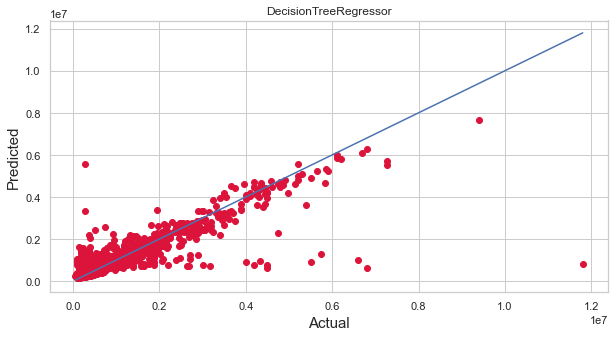

In [122]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("DecisionTreeRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.

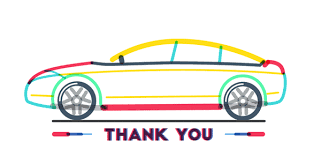